<a href="https://colab.research.google.com/github/Resia05/portfolio/blob/main/Bank_Term_Deposit_Prediction_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Term Deposit Prediction with Machine Learning**

## 0. Description

**Welcome to my project on predicting customer deposits!**

This is part of my journey in learning practical applications of machine learning for real-world challenges. Here, I apply classification techniques to forecast whether a client will subscribe to a term deposit at a bank, a task that mirrors similar challenges across various industries—predicting customer behavior and preferences to support decision-making.

**Project Overview**

The objective of this project is to build and evaluate a predictive model that can help banks better understand which customers are likely to subscribe to a term deposit. Such insights are valuable across many business contexts where understanding potential customer actions—such as purchasing a product, staying active on a site, or committing to a subscription—can inform more targeted strategies and resource allocation.

**Dataset and Task**

I worked with a dataset from the  [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/222/bank+marketing), which contains records from a Portuguese bank’s direct marketing campaigns conducted via phone calls. The dataset's target variable, labeled as y, represents whether a client ultimately subscribed to a term deposit, making this a straightforward binary classification task.

To complete this project, I used the bank-additional-full.csv dataset, available for download [here](https://drive.google.com/file/d/1pDr0hAOnu1JsEiJeBu_F2Jv0GPxKiujW/view). This project helped me deepen my understanding of classification techniques and practical machine learning workflows while developing a model that could support more informed, data-driven customer engagement strategies.

| Variable     | Description                                                                               | Data Type          | Values                                                                                                                |
|--------------|-------------------------------------------------------------------------------------------|---------------------|-----------------------------------------------------------------------------------------------------------------------|
| **age**      | Client's age                                                                              | Numeric            | Integer values                                                                                                        |
| **job**      | Type of job                                                                               | Categorical        | "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services" |
| **marital**  | Marital status                                                                            | Categorical        | "married", "divorced", "single"                                                                                      |
| **education**| Education level                                                                          | Categorical        | "unknown", "secondary", "primary", "tertiary"                                                                        |
| **default**  | Has credit in default                                                                     | Binary             | "yes", "no"                                                                                                          |
| **balance**  | Average yearly balance in euros                                                           | Numeric            | Integer values                                                                                                        |
| **housing**  | Has a housing loan                                                                        | Binary             | "yes", "no"                                                                                                          |
| **loan**     | Has a personal loan                                                                       | Binary             | "yes", "no"                                                                                                          |
| **contact**  | Type of communication for the last contact                                                | Categorical        | "unknown", "telephone", "cellular"                                                                                   |
| **day**      | Last contact day of the month                                                             | Numeric            | Integer values                                                                                                        |
| **month**    | Last contact month of the year                                                            | Categorical        | "jan", "feb", "mar", ..., "nov", "dec"                                                                               |
| **duration** | Duration of the last contact in seconds                                                   | Numeric            | Integer values                                                                                                        |
| **campaign** | Number of contacts performed during this campaign for this client (including last contact) | Numeric            | Integer values                                                                                                        |
| **pdays**    | Days since last contact from a previous campaign                                          | Numeric            | Integer values; -1 means client was not previously contacted                                                          |
| **previous** | Number of contacts performed before this campaign for this client                         | Numeric            | Integer values                                                                                                        |
| **poutcome** | Outcome of the previous marketing campaign                                                | Categorical        | "unknown", "other", "failure", "success"                                                                             |
| **y**        | Client subscribed to a term deposit                                                       | Binary (target)    | "yes", "no"                                                                                                          |


**Project Plan**:

Building a Solution for a Binary Classification Problem
In this project, I aim to develop a solution for a binary classification task, following these steps:

**📊 1. Conducting Exploratory Data Analysis (EDA)**

- Start with EDA to analyze the dataset’s features and identify potential patterns.
- Generate hypotheses about which specific features might significantly impact the target variable, y.
- Use visualization and statistical methods to validate these hypotheses and gain a better understanding of the data.

**🧠 2. Choosing Methods and Evaluation Metric**

- Identify and outline the machine learning methods suitable for this problem.
- Select a performance metric for model evaluation, explaining the reasoning behind the choice to ensure alignment with project goals and data characteristics.

**🔄 3. Data Preprocessing**

- Preprocessing is essential to prepare the data effectively for model training. Steps will include:
- Categorical variable processing: Encode categorical variables as needed based on model requirements.
- Category grouping: Group categories within categorical variables where it enhances model performance.
- Missing values handling: Identify any missing values and apply appropriate imputation techniques.
- Outlier detection and handling: Recognize outliers, decide on their treatment, and assess their impact on model robustness.
- Feature engineering: Create additional features to enhance the accuracy of machine learning models.

**🤖 4. Model Training**

- Train four different machine learning models to evaluate various approaches, including:

       Logistic Regression
       k-Nearest Neighbors (kNN)
       Decision Tree

- A boosting algorithm (e.g., XGBoost or LightGBM)
- Ensure diversity in model types and a balanced approach, from simpler models to more complex ensemble methods.

**📊 5. Model Comparison**

- Create a comparison table to document each model's performance, either in Google Sheets or directly in Jupyter Notebook. This table should include:

       Model name  
       Hyperparameters
       Performance metric on training set
       Performance metric on validation set

- Comments on model quality: Assess if the model is a good fit, if it should be used further, and potential ideas for improvements.

**🔍 6. Hyperparameter Tuning for the Boosting Algorithm**
- Apply two tuning methods to the boosting model:

       Randomized Search (using sklearn)
       Bayesian Optimization (using Hyperopt)

- Compare the effectiveness of each tuning method and document the optimal hyperparameters, along with insights on their impact on model performance.

**📉 7. Feature Importance and Evaluation**

- For the best-performing model, analyze feature importance to identify which features contribute most to the predictions.
- Evaluate whether these results align with common-sense expectations and if the model’s prioritization of features appears reasonable.

**🧩 8. Error Analysis and Solution Refinement**

- Examine records where the model misclassifies data points, analyzing the reasons behind these errors.
- Explore and recommend adjustments to improve model accuracy and reduce the error rate.

## 1. Load Dataset & Exploratory Data Analysis (EDA)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn.metrics import roc_auc_score
import joblib
import warnings
from IPython.display import display, HTML
import plotly.express as px
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint, loguniform
import numpy as np
import pandas as pd
from hyperopt import hp, tpe, Trials, fmin
from hyperopt.pyll.base import scope
from sklearn.metrics import classification_report
# pip install hyperopt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mid-term Project/bank-additional-full.csv',sep=';')

In [ ]:
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### EDA

In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


The value of 999 in the 'pdays' column appears to be an error and could negatively impact results for this column. According to the dataset description, a value of -1 should indicate cases where no prior contact was made, yet there are no such -1 values in the data. Therefore, it seems appropriate to replace 999 with -1.

In [ ]:
# Replacing 999 with -1 in the 'pdays' column using .loc
data.loc[data['pdays'] == 999, 'pdays'] = -1

In [ ]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,-0.741988,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,1.510327,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,-1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,-1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,-1.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,-1.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,27.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
categorical_cols = data.select_dtypes(include='object').columns

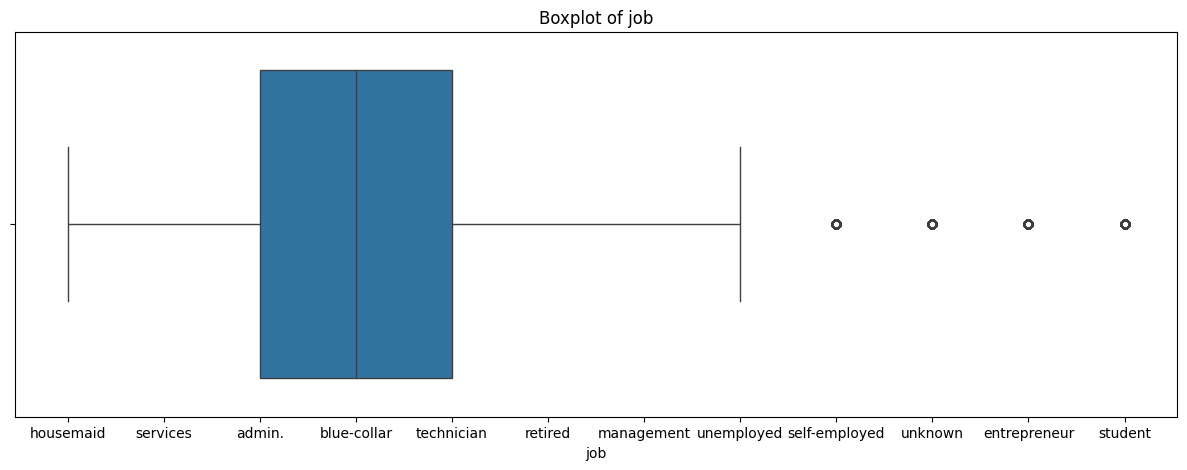

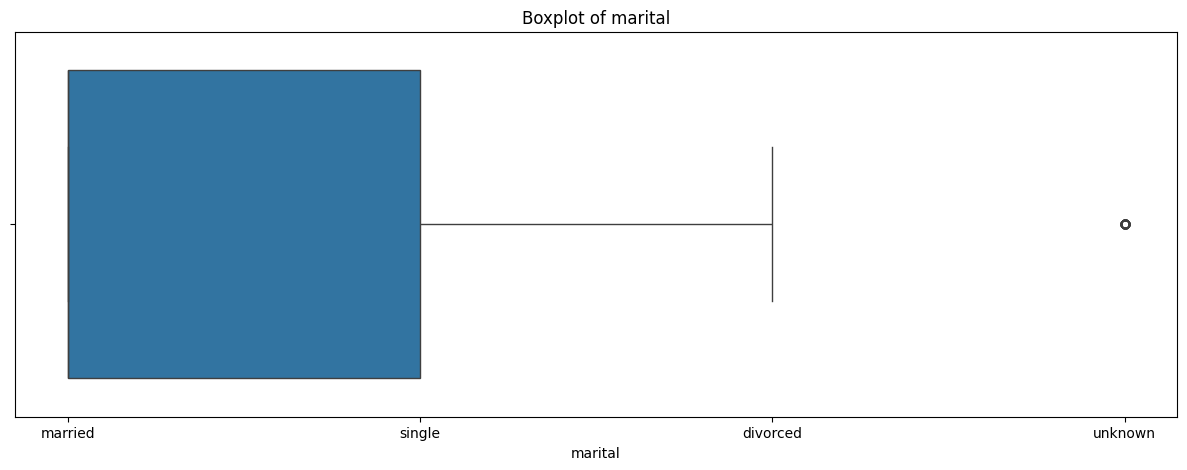

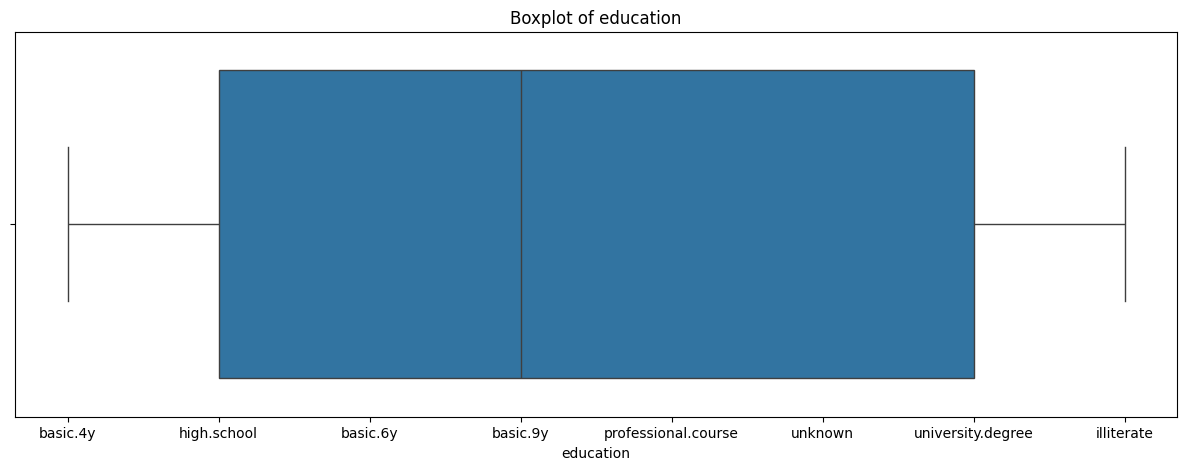

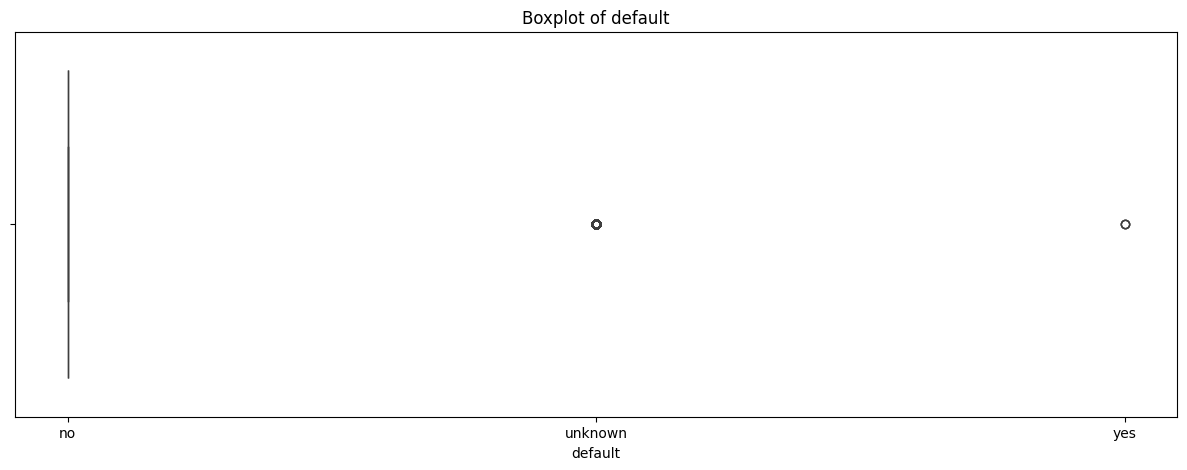

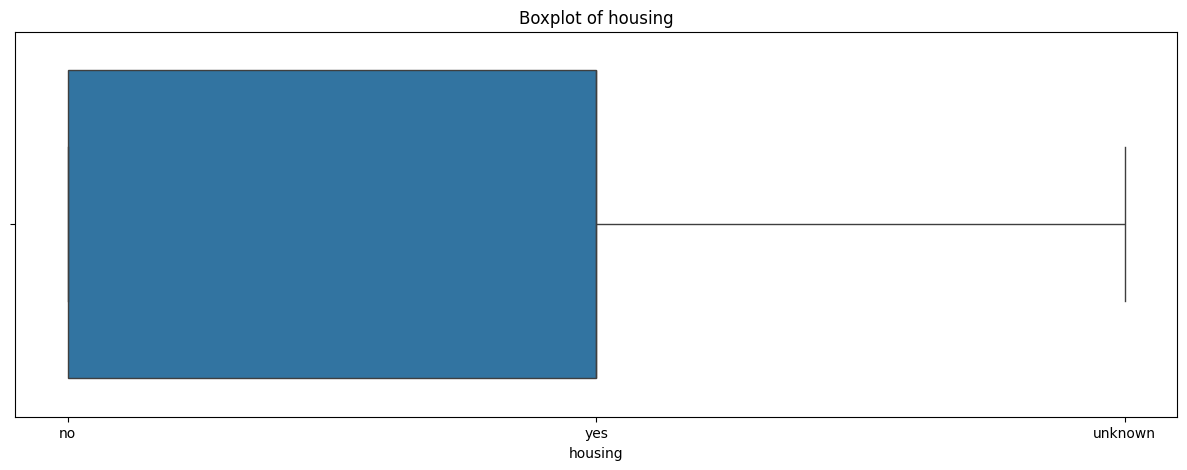

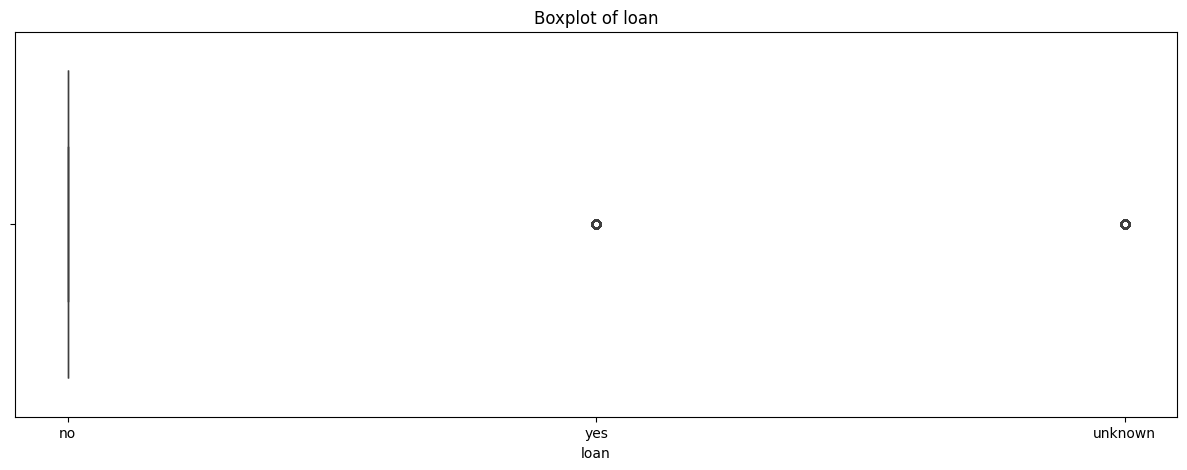

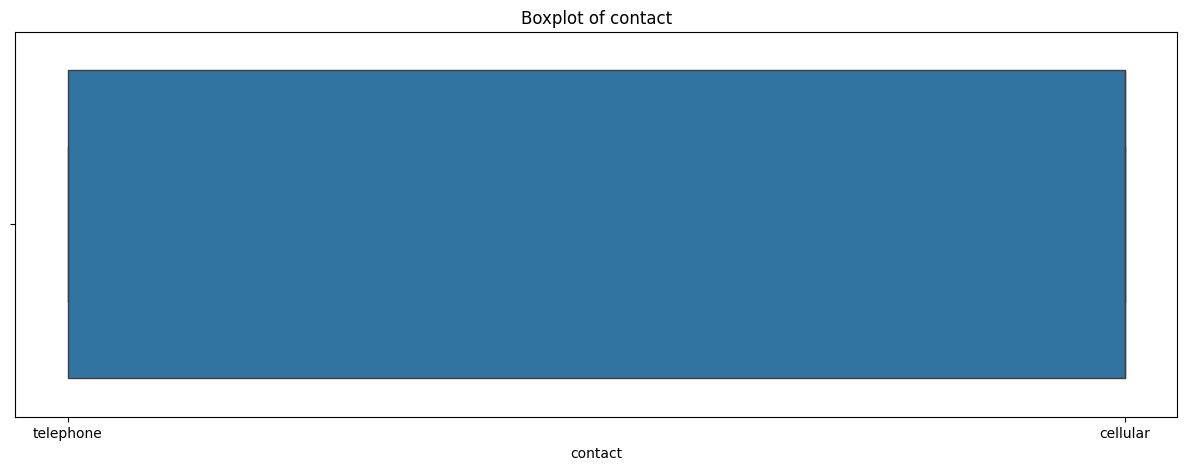

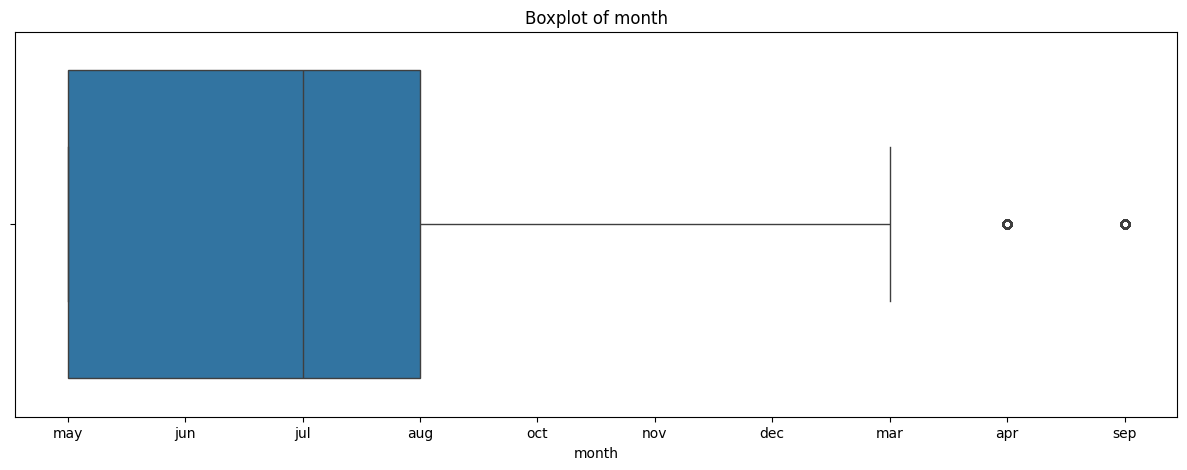

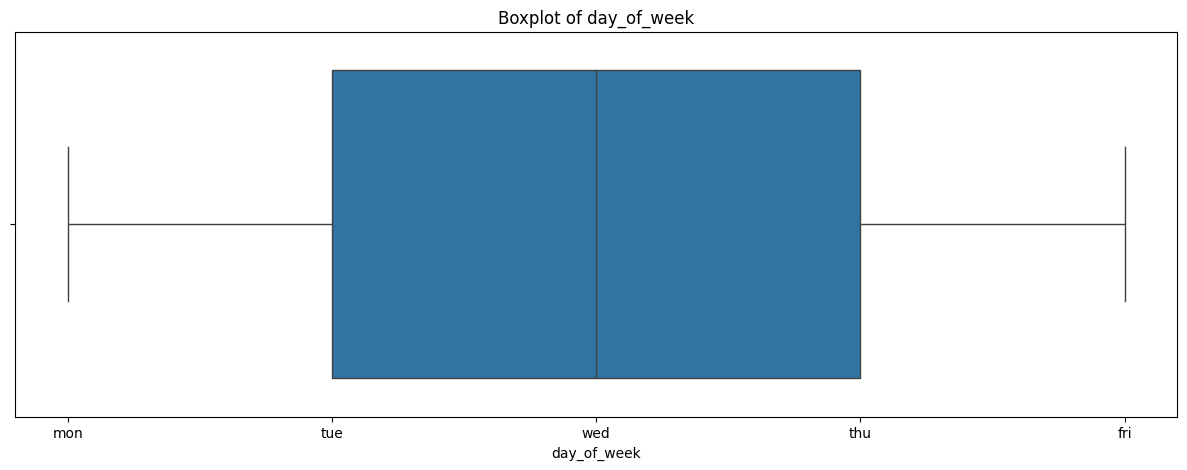

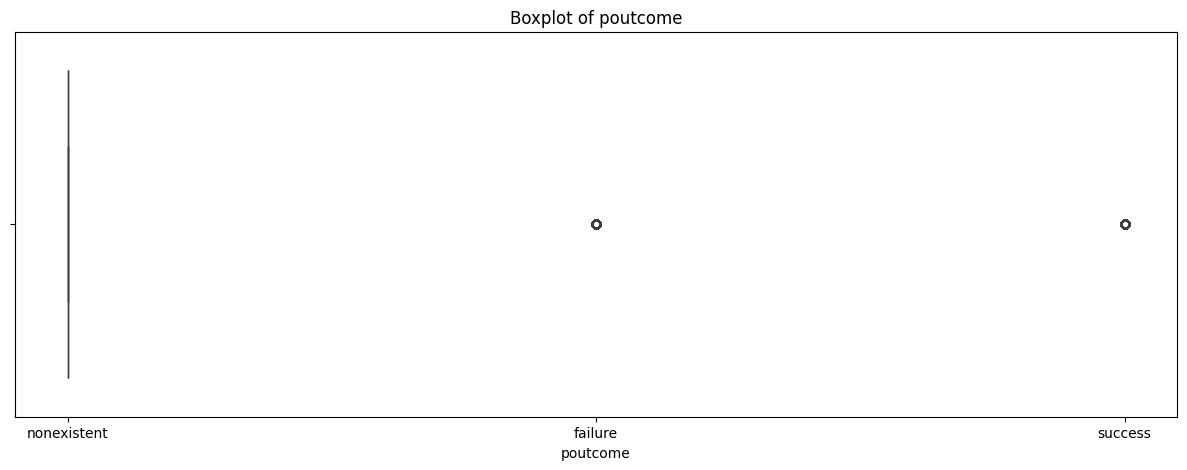

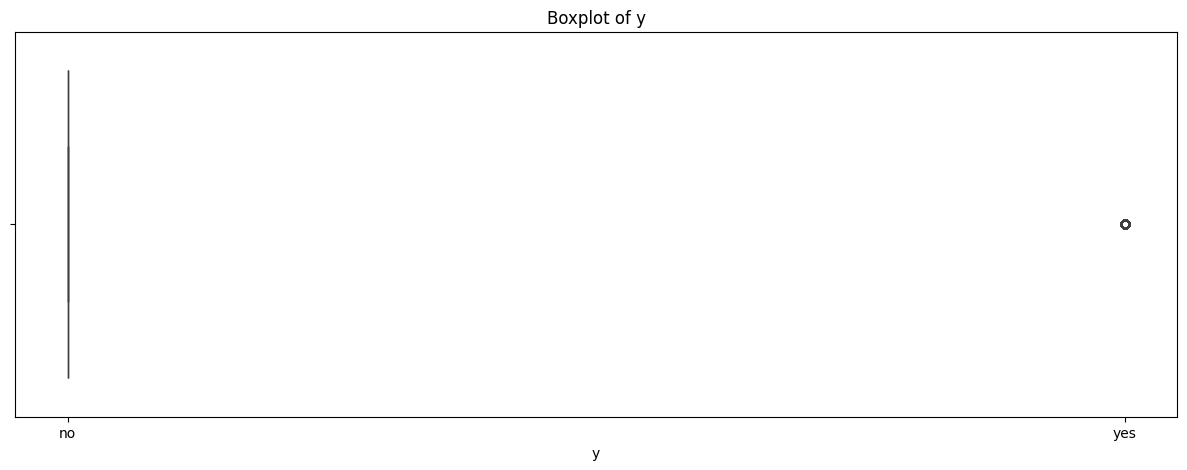

In [ ]:
# Visualizing Outliers for Each Numerical Column
for col in categorical_cols:
    plt.figure(figsize=(15, 5))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

There are many outliers, so this needs to be considered when training the model and choosing the tools. I currently believe it is inappropriate to remove or replace them.

In [ ]:
data.shape

(41188, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# Get all columns of type object
object_columns = data.select_dtypes(include='object')

# Create a list to store results
results = []

# Populate the list with results
for column in object_columns.columns:
    unique_values = object_columns[column].unique()
    num_unique_values = object_columns[column].nunique()

    results.append({
        'Column': column,
        'Unique Values': unique_values,
        'Number of Unique Values': num_unique_values
    })

# Convert the list into a DataFrame
results_df = pd.DataFrame(results)

# If you need to see detailed value frequencies, uncomment the following code:
# for col in object_columns.columns:
#    print(f'\n\n{col}')
#    print(f'Number of unique values: {data[col].nunique()}\n')
#    print(data[col].value_counts())

results_df

,Column,Unique Values,Number of Unique Values
0,job,"[housemaid, services, admin., blue-collar, tec...",12
1,marital,"[married, single, divorced, unknown]",4
2,education,"[basic.4y, high.school, basic.6y, basic.9y, pr...",8
3,default,"[no, unknown, yes]",3
4,housing,"[no, yes, unknown]",3
5,loan,"[no, yes, unknown]",3
6,contact,"[telephone, cellular]",2
7,month,"[may, jun, jul, aug, oct, nov, dec, mar, apr, ...",10
8,day_of_week,"[mon, tue, wed, thu, fri]",5
9,poutcome,"[nonexistent, failure, success]",3


In [ ]:
# Get all columns of type object
object_columns = data.select_dtypes(include='object')

# Display unique values for each object column
for column in object_columns.columns:
    unique_values = object_columns[column].unique()
    print(f"Unique values for column '{column}': {unique_values}")

Unique values for column 'job': ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Unique values for column 'marital': ['married' 'single' 'divorced' 'unknown']
Unique values for column 'education': ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Unique values for column 'default': ['no' 'unknown' 'yes']
Unique values for column 'housing': ['no' 'yes' 'unknown']
Unique values for column 'loan': ['no' 'yes' 'unknown']
Unique values for column 'contact': ['telephone' 'cellular']
Unique values for column 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Unique values for column 'day_of_week': ['mon' 'tue' 'wed' 'thu' 'fri']
Unique values for column 'poutcome': ['nonexistent' 'failure' 'success']
Unique values for column 'y': ['no' 'yes']


In [ ]:
# Define the number of unique values for each object column

# Get all object type columns
object_columns = data.select_dtypes(include='object')

# Create a list to store DataFrames
df_list = []

# Loop through each object column to generate value counts
for column in object_columns.columns:
    value_counts = data[column].value_counts()
    # Create a DataFrame for the value counts
    count_df = value_counts.reset_index()
    count_df.columns = [column, 'Count']  # Rename columns for clarity

    # Convert DataFrame to object type to avoid FutureWarning
    count_df = count_df.astype(object)

    # Replace NaN values with empty strings
    count_df.fillna('', inplace=True)

    df_list.append(count_df)

# Concatenate all DataFrames side by side
result_df = pd.concat(df_list, axis=1)

# Convert the final DataFrame to object type to avoid FutureWarning
result_df = result_df.astype(object)

# Replace NaN with empty strings in the final result
result_df.fillna('', inplace=True)

# Display the concatenated DataFrame as HTML
display(HTML(result_df.to_html(index=False)))

job,Count,marital,Count,education,Count,default,Count,housing,Count,loan,Count,contact,Count,month,Count,day_of_week,Count,poutcome,Count,y,Count
admin.,10422,married,24928,university.degree,12168,no,32588,yes,21576,no,33950,cellular,26144,may,13769,thu,8623,nonexistent,35563,no,36548
blue-collar,9254,single,11568,high.school,9515,unknown,8597,no,18622,yes,6248,telephone,15044,jul,7174,mon,8514,failure,4252,yes,4640
technician,6743,divorced,4612,basic.9y,6045,yes,3,unknown,990,unknown,990,,,aug,6178,wed,8134,success,1373,,
services,3969,unknown,80,professional.course,5243,,,,,,,,,jun,5318,tue,8090,,,,
management,2924,,,basic.4y,4176,,,,,,,,,nov,4101,fri,7827,,,,
retired,1720,,,basic.6y,2292,,,,,,,,,apr,2632,,,,,,
entrepreneur,1456,,,unknown,1731,,,,,,,,,oct,718,,,,,,
self-employed,1421,,,illiterate,18,,,,,,,,,sep,570,,,,,,
housemaid,1060,,,,,,,,,,,,,mar,546,,,,,,
unemployed,1014,,,,,,,,,,,,,dec,182,,,,,,


In [ ]:
# Check for missing values and zeros in the DataFrame
def check_missing(df):
    # Count of missing values
    missing_count = df.isnull().sum()

    # Count of zeros
    zero_count = (df == 0).sum()

    # Total number of records
    total_count = df.shape[0]

    # Percentage of missing values
    missing_percentage = (missing_count / total_count) * 100

    # Percentage of zeros
    zero_percentage = (zero_count / total_count) * 100

    # Create a DataFrame for results
    result_missing_df = pd.DataFrame({
        'Missing Count': missing_count,
        'Zero Count': zero_count,
        'Missing Percentage': missing_percentage,
        'Zero Percentage': zero_percentage
    })

    # Remove columns that are all zeros (optional)
    result_missing_df = result_missing_df[result_missing_df.sum(axis=1) > 0]

    return result_missing_df

# Example usage: missing_info = check_missing(data) display(missing_info)

In [ ]:
# Check for missing values and zeros in the entire dataset
print("Missing and Zero Values:")
missing_zero = check_missing(data)
missing_zero

Missing and Zero Values:


,Missing Count,Zero Count,Missing Percentage,Zero Percentage
duration,0,4,0.0,0.009712
pdays,0,15,0.0,0.036418
previous,0,35563,0.0,86.343110


There is no need to work with missing values. The data has already been cleaned for further analysis.

In [ ]:
# Checking for duplicates in the entire DataFrame
duplicates = data[data.duplicated()]

duplicates

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,-1,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,-1,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,-1,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,-1,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,-1,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,-1,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,-1,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,-1,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,-1,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,-1,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [ ]:
data=data[~data.duplicated()]

In [ ]:
data.shape

(41176, 21)

There were very few duplicates, so there is no need to conduct further analysis for a general understanding of the data. If there had been many duplicates, it would have been necessary to redo the previous steps.

In [ ]:
# Suppress the SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

# Convert the binary variable 'y' to numeric format to determine correlation with the target variable
data.loc[:, 'y_num'] = data['y'].map({'yes': 1, 'no': 0})

# Compute the correlation matrix for all numerical variables
correlation_matrix = data.select_dtypes(include=[np.number]).corr()

# Check if 'y_num' is in the correlation matrix
if 'y_num' in correlation_matrix.columns:
    correlation_with_y = correlation_matrix['y_num']
else:
    correlation_with_y = pd.Series(dtype=float)  # Return an empty series if 'y_num' is not present

# Output the correlation
print("Кореляція з цільовою змінною 'y':")
correlation_with_y

Кореляція з цільовою змінною 'y':


,y_num
age,0.030381
duration,0.405297
campaign,-0.066361
pdays,0.279053
previous,0.230202
emp.var.rate,-0.298289
cons.price.idx,-0.136134
cons.conf.idx,0.054802
euribor3m,-0.307740
nr.employed,-0.354669


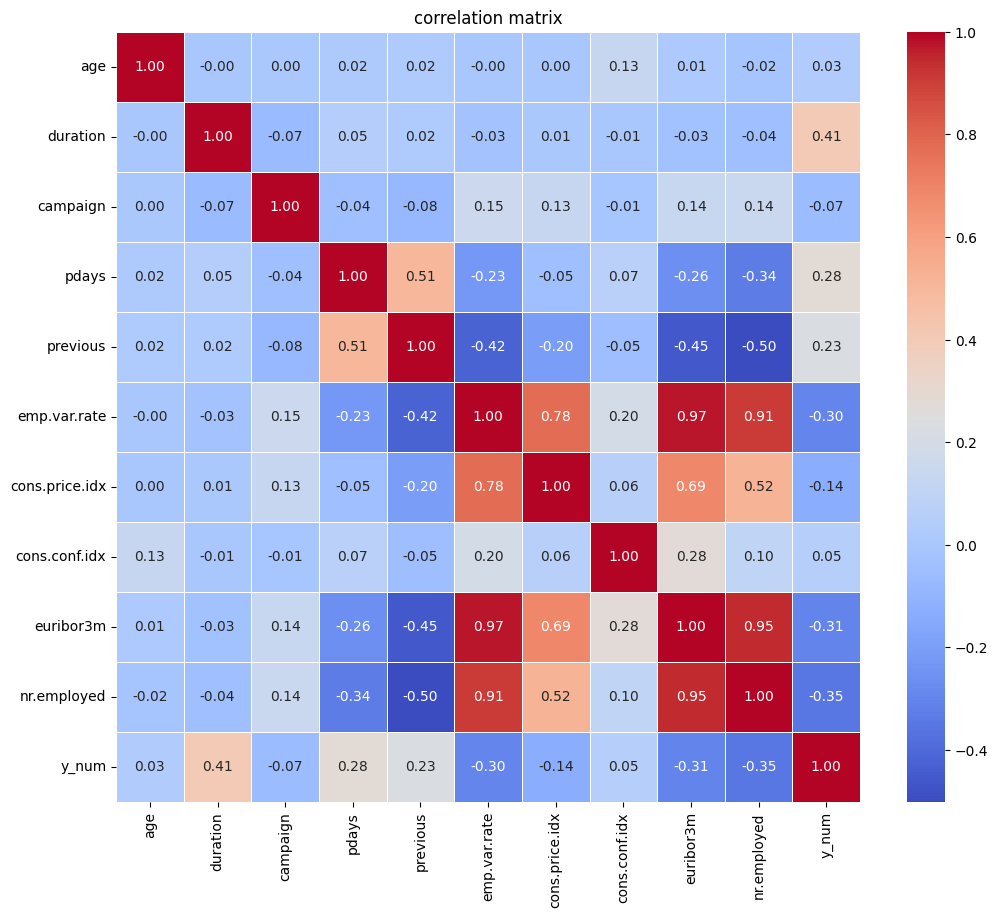

In [ ]:
# Suppress any warnings during the visualization
warnings.simplefilter(action='ignore')

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('correlation matrix')
plt.show()

In [ ]:
# Create an interactive box plot
fig = px.box(data, x='y', y='duration', title='Boxplot of Duration by Target Variable')

# Update layout for better appearance (optional)
fig.update_layout(
    xaxis_title='Target Variable',
    yaxis_title='Duration',
    boxmode='overlay'
)

# Show the plot
fig.show()

In [ ]:
class_counts = data['y'].value_counts()
print(class_counts)

y
no     36537
yes     4639
Name: count, dtype: int64


### EDA Conclusions

Regarding the choice of evaluation metrics, I plan to use several metrics moving forward. However, I will primarily focus on ROC-AUC, as I am familiar with it and it takes both precision and sensitivity into account. Other metrics may not perform well, especially with imbalanced classes. As a secondary metric, I may consider the F1 Score.

Through EDA, I observed that there are many outliers in the data, so I need to focus on models that are less sensitive to these outliers.

Currently, the target variable has the highest correlation with "duration," which will be reassessed after preprocessing. The feature with the least influence at this point is "age."

Overall, the data looks good—logical and without missing values. During the preprocessing stage, the data will be reloaded, duplicates will be removed, and values of 999 will be replaced.

## 2. Splitting Data into Training and Validation Sets and Preprocessing

In [ ]:
# Load the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mid-term Project/bank-additional-full.csv', sep=';')

# Remove duplicates
df = df.drop_duplicates()

# Replace values: 999 in 'pdays' with -1
df.loc[df['pdays'] == 999, 'pdays'] = -1

# Map binary target variable 'y' to numerical values
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Split the data into features (X) and target variable (y)
X = df.drop(columns='y')
y = df['y']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify categorical and numeric columns
categorical_cols = X_train.select_dtypes(include='object').columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Create pipelines for numeric and categorical data
numeric_pipeline = Pipeline([('scaler', MinMaxScaler())])  # Assuming no missing values
categorical_pipeline = Pipeline([('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))])

# Combine pipelines into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ]
)

# Fit the ColumnTransformer on training data
preprocessor.fit(X_train)

# Transform training and validation sets
X_train_preprocessed = pd.DataFrame(
    preprocessor.transform(X_train),
    columns=(numeric_cols.tolist() +
             preprocessor.named_transformers_['cat']
             .named_steps['onehot']
             .get_feature_names_out(categorical_cols).tolist()),
    index=X_train.index
)

X_val_preprocessed = pd.DataFrame(
    preprocessor.transform(X_val),
    columns=(numeric_cols.tolist() +
             preprocessor.named_transformers_['cat']
             .named_steps['onehot']
             .get_feature_names_out(categorical_cols).tolist()),
    index=X_val.index
)

In [ ]:
# Check the sizes of the obtained datasets
print(f'Size of training set X: {X_train.shape}')
print(f'Size of validation set X: {X_val.shape}')
print(f'Size of training set y: {y_train.shape}')
print(f'Size of validation set y: {y_val.shape}')

# Check class distribution
print('\nClass distribution in the original data:')
print(y.value_counts(normalize=True))

print('\nClass distribution in the training set:')
print(y_train.value_counts(normalize=True))

print('\nClass distribution in the validation set:')
print(y_val.value_counts(normalize=True))

Size of training set X: (32940, 20)
Size of validation set X: (8236, 20)
Size of training set y: (32940,)
Size of validation set y: (8236,)

Class distribution in the original data:
y
0    0.887337
1    0.112663
Name: proportion, dtype: float64

Class distribution in the training set:
y
0    0.887341
1    0.112659
Name: proportion, dtype: float64

Class distribution in the validation set:
y
0    0.887324
1    0.112676
Name: proportion, dtype: float64


In [ ]:
X_train_preprocessed.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
36454,0.086420,0.029055,0.018182,0.0,0.142857,0.104167,0.296960,0.418410,0.142371,0.425709,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1233,0.185185,0.266492,0.000000,0.0,0.000000,0.937500,0.698753,0.602510,0.956926,0.859735,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
24111,0.197531,0.040010,0.000000,0.0,0.000000,0.687500,0.389322,0.368201,0.818635,0.877883,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
15516,0.259259,0.030722,0.054545,0.0,0.000000,1.000000,0.669135,0.338912,0.980050,1.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17916,0.271605,0.046916,0.054545,0.0,0.000000,1.000000,0.669135,0.338912,0.980957,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


I decided to implement normalization and encoding of categorical features from all the preprocessing actions suggested in the task. I don't see a need to group the data since there aren't too many columns for the model (63). Notably, no missing values were found. However, there are visually many outliers, so ignoring them in the model would be a mistake. I processed the only outlier "999," as such a value should not exist. I did not create any additional features.

# 3. TRAINING MODELS

## Basic without improvements

In [ ]:
def evaluate_model(y_train, y_train_pred, y_val, y_val_pred, model_name):
    """
    Evaluate the performance of a model using ROC-AUC and F1 Score.

    Parameters:
    y_train (array-like): True labels for the training set.
    y_train_pred (array-like): Predicted labels for the training set.
    y_val (array-like): True labels for the validation set.
    y_val_pred (array-like): Predicted labels for the validation set.
    model_name (str): Name of the model being evaluated.

    Returns:
    None
    """
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    roc_auc_val = roc_auc_score(y_val, y_val_pred)
    f1_train = f1_score(y_train, y_train_pred)
    f1_val = f1_score(y_val, y_val_pred)

    print(model_name)
    print(f"Train ROC-AUC: {roc_auc_train:.4f}")
    print(f"Validation ROC-AUC: {roc_auc_val:.4f}")
    print(f"Train F1 Score: {f1_train:.4f}")
    print(f"Validation F1 Score: {f1_val:.4f}")

# Example usage:
# evaluate_model(y_train, y_train_pred, y_val, y_val_pred, "Logistic Regression")

In [ ]:
# Ignore warnings
warnings.filterwarnings("ignore")

# Create and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_preprocessed, y_train)

# Make predictions on training and validation sets
y_train_pred = log_reg.predict(X_train_preprocessed)
y_val_pred = log_reg.predict(X_val_preprocessed)

# Evaluate the model using the custom function
evaluate_model(y_train, y_train_pred, y_val, y_val_pred, "Logistic Regression")

Logistic Regression
Train ROC-AUC: 0.6873
Validation ROC-AUC: 0.6874
Train F1 Score: 0.5014
Validation F1 Score: 0.4993


In [ ]:
# Create and train the kNN model
knn = KNeighborsClassifier()
knn.fit(X_train_preprocessed, y_train)

# Predict on the training and validation sets
y_train_pred = knn.predict(X_train_preprocessed)
y_val_pred = knn.predict(X_val_preprocessed)

# Evaluate the model using the custom function
evaluate_model(y_train, y_train_pred, y_val, y_val_pred, "k-Nearest Neighbors")

k-Nearest Neighbors
Train ROC-AUC: 0.6723
Validation ROC-AUC: 0.6034
Train F1 Score: 0.4875
Validation F1 Score: 0.3238


In [ ]:
# Create and train the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_preprocessed, y_train)

# Predict on the training and validation sets
y_train_pred = decision_tree.predict(X_train_preprocessed)
y_val_pred = decision_tree.predict(X_val_preprocessed)

# Evaluate the model using the custom function
evaluate_model(y_train, y_train_pred, y_val, y_val_pred, "Decision Tree")

Decision Tree
Train ROC-AUC: 1.0000
Validation ROC-AUC: 0.7292
Train F1 Score: 1.0000
Validation F1 Score: 0.5165


In [ ]:
# Create and train the Random Forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_preprocessed, y_train)

# Predict on the training and validation sets
y_train_pred = random_forest.predict(X_train_preprocessed)
y_val_pred = random_forest.predict(X_val_preprocessed)

# Evaluate the model using the custom function
evaluate_model(y_train, y_train_pred, y_val, y_val_pred, "Random Forest")

Random Forest
Train ROC-AUC: 0.9999
Validation ROC-AUC: 0.7192
Train F1 Score: 0.9999
Validation F1 Score: 0.5489


The k-Nearest Neighbors model showed the worst results, so I will not improve this model at this time. The trees are very similar to each other, so I will keep only one of them. The next step will be to improve the logistic regression and decision trees, as well as implement boosting.

## Improvements for Logistic Regression and Random Forest

### Working with Class Balancing

In [ ]:
# Transforming the target variable 'y' into a numeric format (0 and 1) for the training set
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Defining SMOTE and RandomUnderSampler
smote = SMOTE(random_state=42)
under_sampler = RandomUnderSampler(random_state=42)

# First, apply SMOTE to the training data
X_smote, y_smote = smote.fit_resample(X_train_preprocessed, y_train_encoded)

# Then, apply RandomUnderSampler to the data obtained from SMOTE
X_resampled, y_resampled = under_sampler.fit_resample(X_smote, y_smote)

# Displaying class distribution in the training set after resampling
y_resampled_df = pd.Series(y_resampled)
print("Class distribution in the training set after resampling:")
print(y_resampled_df.value_counts(normalize=True).map(lambda x: '{:.6f}'.format(x)))

# Displaying the size of the training set after resampling
print("Size of the training set X after resampling:", X_resampled.shape)
print("Size of the target variable y after resampling:", y_resampled.shape)

# Ensuring that the validation set remains unchanged
print("Size of the validation set X:", X_val_preprocessed.shape)
print("Size of the target variable y:", y_val.shape)

# Displaying class distribution in the validation set
y_val_df = pd.Series(y_val)
print("Class distribution in the validation set:")
print(y_val_df.value_counts(normalize=True).map(lambda x: '{:.6f}'.format(x)))

Class distribution in the training set after resampling:
0    0.500000
1    0.500000
Name: proportion, dtype: object
Size of the training set X after resampling: (58458, 63)
Size of the target variable y after resampling: (58458,)
Size of the validation set X: (8236, 63)
Size of the target variable y: (8236,)
Class distribution in the validation set:
y
0    0.887324
1    0.112676
Name: proportion, dtype: object


In [ ]:
X_resampled

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.086420,0.029055,0.018182,0.0,0.142857,0.104167,0.296960,0.418410,0.142371,0.425709,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.000000,0.0
2,0.197531,0.040010,0.000000,0.0,0.000000,0.687500,0.389322,0.368201,0.818635,0.877883,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,1.000000,0.0
3,0.259259,0.030722,0.054545,0.0,0.000000,1.000000,0.669135,0.338912,0.980050,1.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0
4,0.271605,0.046916,0.054545,0.0,0.000000,1.000000,0.669135,0.338912,0.980957,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,1.000000,0.0
5,0.320988,0.006668,0.054545,0.0,0.000000,1.000000,0.882307,0.376569,0.958966,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50804,0.211054,0.123617,0.005628,0.0,0.098637,0.333333,0.269680,0.192469,0.154975,0.512287,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.690462,0.309538,0.0
34619,0.148148,0.355788,0.032980,0.0,0.000000,0.687500,0.389322,0.368201,0.767853,0.877883,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0
7901,0.296296,0.198619,0.000000,0.0,0.000000,0.333333,0.340608,0.154812,0.165722,0.512287,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,1.000000,0.0
45024,0.503674,0.198483,0.050866,0.0,0.000000,1.000000,0.669135,0.338912,0.980050,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.000000,0.0


In [ ]:
# Training Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_resampled, y_resampled)

# Predictions for training and validation sets
y_train_pred_log_reg = log_reg.predict(X_resampled)
y_val_pred_log_reg = log_reg.predict(X_val_preprocessed)

# Evaluating Logistic Regression using the evaluate_model function
evaluate_model(y_resampled, y_train_pred_log_reg, y_val, y_val_pred_log_reg, "Logistic Regression")

# Training Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_resampled, y_resampled)

# Predictions for training and validation sets
y_train_pred_rf = random_forest.predict(X_resampled)
y_val_pred_rf = random_forest.predict(X_val_preprocessed)

# Evaluating Random Forest using the evaluate_model function
evaluate_model(y_resampled, y_train_pred_rf, y_val, y_val_pred_rf, "Random Forest")

Logistic Regression
Train ROC-AUC: 0.8826
Validation ROC-AUC: 0.8822
Train F1 Score: 0.8849
Validation F1 Score: 0.6068
Random Forest
Train ROC-AUC: 1.0000
Validation ROC-AUC: 0.7888
Train F1 Score: 1.0000
Validation F1 Score: 0.6146


### Polynomial Features

In [ ]:
# Creating Polynomial Features (e.g., degree 2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Transforming Training and Validation Data
X_train_poly = poly_features.fit_transform(X_resampled)
X_val_poly = poly_features.transform(X_val_preprocessed)

# Training Logistic Regression with Polynomial Features
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_poly, y_resampled)

# Predictions for Training and Validation Sets
y_train_pred_log_reg = log_reg.predict(X_train_poly)
y_val_pred_log_reg = log_reg.predict(X_val_poly)

# Evaluating Logistic Regression using the evaluate_model function
evaluate_model(y_resampled, y_train_pred_log_reg, y_val, y_val_pred_log_reg, "Logistic Regression")

# Training Random Forest with Polynomial Features
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_poly, y_resampled)

# Predictions for Training and Validation Sets
y_train_pred_rf = random_forest.predict(X_train_poly)
y_val_pred_rf = random_forest.predict(X_val_poly)

# Evaluating Random Forest using the evaluate_model function
evaluate_model(y_resampled, y_train_pred_rf, y_val, y_val_pred_rf, "Random Forest")

Logistic Regression
Train ROC-AUC: 0.9364
Validation ROC-AUC: 0.8143
Train F1 Score: 0.9367
Validation F1 Score: 0.6118
Random Forest
Train ROC-AUC: 1.0000
Validation ROC-AUC: 0.8100
Train F1 Score: 1.0000
Validation F1 Score: 0.6212


In [ ]:
# 1. Find the correlation of numerical features with the target variable
numeric_cols = X_resampled.select_dtypes(include=[np.number]).columns.tolist()

# Assuming `y_resampled` is your target variable
X_resampled_with_target = pd.DataFrame(X_resampled, columns=numeric_cols)
X_resampled_with_target['target'] = y_resampled

# Calculate the correlation matrix
correlation_matrix = X_resampled_with_target.corr()
correlation_with_target = correlation_matrix['target'].abs()

# Select top 10 features by correlation
top_10_features = correlation_with_target.sort_values(ascending=False).head(10).index.tolist()

# Remove 'target' from the list of top 10 features
top_10_features.remove('target')

print("Top 10 features by correlation:", top_10_features)

# 2. Create polynomial features only for the top 10 features with degree=4
poly_features = PolynomialFeatures(degree=4, include_bias=False)

# Create ColumnTransformer for polynomial features only for numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('poly', poly_features),
            ('scaler', StandardScaler())
        ]), top_10_features)
    ],
    remainder='passthrough'
)

# Transform training and validation data
X_train_poly = preprocessor.fit_transform(X_resampled)
X_val_poly = preprocessor.transform(X_val_preprocessed)

# 3. Train Logistic Regression with polynomial features
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_poly, y_resampled)

# Predictions for training and validation sets
y_train_pred_log_reg = log_reg.predict(X_train_poly)
y_val_pred_log_reg = log_reg.predict(X_val_poly)

# Evaluating Logistic Regression using the evaluate_model function
evaluate_model(y_resampled, y_train_pred_log_reg, y_val, y_val_pred_log_reg, "Logistic Regression")

# Train Random Forest with polynomial features
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_poly, y_resampled)

# Predictions for training and validation sets
y_train_pred_rf = random_forest.predict(X_train_poly)
y_val_pred_rf = random_forest.predict(X_val_poly)

# Evaluating Random Forest using the evaluate_model function
evaluate_model(y_resampled, y_train_pred_rf, y_val, y_val_pred_rf, "Random Forest")

Top 10 features by correlation: ['duration', 'nr.employed', 'euribor3m', 'emp.var.rate', 'poutcome_success', 'pdays', 'contact_cellular', 'contact_telephone', 'previous']
Logistic Regression
Train ROC-AUC: 0.8974
Validation ROC-AUC: 0.8771
Train F1 Score: 0.9008
Validation F1 Score: 0.5989
Random Forest
Train ROC-AUC: 1.0000
Validation ROC-AUC: 0.8463
Train F1 Score: 1.0000
Validation F1 Score: 0.6273


**Model Results Comparison**

In the analysis process, several models were tested using different data processing methods, and the results show significant improvements in performance after each stage.

**Base Models**

Initially, we looked at the results of the base models:

Logistic Regression

- Validation ROC-AUC: 0.6874
- Validation F1 Score: 0.4993

Random Forest

- Validation ROC-AUC: 0.7192
- Validation F1 Score: 0.5489

These models demonstrated moderate performance but required enhancement.

**After Class Balancing**

After applying the class balancing method, the results improved:

Logistic Regression

- Validation ROC-AUC: 0.8822 (+0.1948)
- Validation F1 Score: 0.6068 (+0.1075)

Random Forest

- Validation ROC-AUC: 0.7888 (+0.0696)
- Validation F1 Score: 0.6146 (+0.0657)

These changes indicate that class balancing helped significantly improve the metrics of both models, especially logistic regression, which showed the most improvement.

**After Adding Polynomial Features (degree 2)**

The application of polynomial features (degree 2) also led to improvements:

Logistic Regression

- Validation ROC-AUC: 0.8143 (+0.0321)
- Validation F1 Score: 0.6118 (+0.0050)

Random Forest

- Validation ROC-AUC: 0.8100 (+0.0212)
- Validation F1 Score: 0.6212 (+0.0066)

This stage confirmed that polynomial features can add valuable information, though not as significantly as class balancing.

**After Using Top-10 Correlated Features and Polynomial Features (degree 4)**

The final stage involved using the top-10 correlated features, which also yielded positive results:

Logistic Regression

- Validation ROC-AUC: 0.8771 (+0.0628)
- Validation F1 Score: 0.5989 (-0.0129)

Random Forest

- Validation ROC-AUC: 0.8463 (+0.0363)
- Validation F1 Score: 0.6273 (+0.0061)

Despite a slight decrease in the F1 Score for logistic regression, the overall performance improved.

**Conclusions**
Overall, the comparison of results shows that class balancing provided the most significant improvement in metrics, particularly for logistic regression, confirming the importance of addressing class imbalance in the data. Polynomial features and correlated features also contributed to enhancing performance; however, class balancing remained the most effective method.



### Combination of Polynomial Features and XGBoost/LightGBM Based on Top Correlated Features

In [ ]:
# 1. Find the correlation of numerical features with the target variable
numeric_cols = X_resampled.select_dtypes(include=[np.number]).columns.tolist()

X_resampled_with_target = pd.DataFrame(X_resampled, columns=numeric_cols)
X_resampled_with_target['target'] = y_resampled

# Calculate the correlation matrix
correlation_matrix = X_resampled_with_target.corr()
correlation_with_target = correlation_matrix['target'].abs()

# Select top-10 features based on correlation
top_10_features = correlation_with_target.sort_values(ascending=False).head(10).index.tolist()

# Remove 'target' from the top-10 feature list
top_10_features.remove('target')

print("Top 10 features by correlation:", top_10_features)

# 2. Create polynomial features only for the top-10 features with degree=4
poly_features = PolynomialFeatures(degree=4, include_bias=False)

# Create a ColumnTransformer for polynomial features only for numeric columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('poly', poly_features),
            ('scaler', StandardScaler())
        ]), top_10_features)
    ],
    remainder='passthrough'
)

# Transform the training and validation data
X_train_poly = preprocessor.fit_transform(X_resampled)
X_val_poly = preprocessor.transform(X_val_preprocessed)

# 3. Train Logistic Regression with polynomial features
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_poly, y_resampled)

# Predictions for training and validation sets
y_train_pred_log_reg = log_reg.predict(X_train_poly)
y_val_pred_log_reg = log_reg.predict(X_val_poly)

# Evaluate Logistic Regression using the evaluate_model function
evaluate_model(y_resampled, y_train_pred_log_reg, y_val, y_val_pred_log_reg, "Logistic Regression")

# 4. Train Random Forest with polynomial features
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_poly, y_resampled)

# Predictions for training and validation sets
y_train_pred_rf = random_forest.predict(X_train_poly)
y_val_pred_rf = random_forest.predict(X_val_poly)

# Evaluate Random Forest using the evaluate_model function
evaluate_model(y_resampled, y_train_pred_rf, y_val, y_val_pred_rf, "Random Forest")

# 5. Train XGBoost with polynomial features
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_poly, y_resampled)

# Predictions for training and validation sets
y_train_pred_xgb = xgb.predict(X_train_poly)
y_val_pred_xgb = xgb.predict(X_val_poly)

# Evaluate XGBoost using the evaluate_model function
evaluate_model(y_resampled, y_train_pred_xgb, y_val, y_val_pred_xgb, "XGBoost")

# 6. Train LightGBM with polynomial features
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train_poly, y_resampled)

# Predictions for training and validation sets
y_train_pred_lgbm = lgbm.predict(X_train_poly)
y_val_pred_lgbm = lgbm.predict(X_val_poly)

# Evaluate LightGBM using the evaluate_model function
evaluate_model(y_resampled, y_train_pred_lgbm, y_val, y_val_pred_lgbm, "LightGBM")

Top 10 features by correlation: ['duration', 'nr.employed', 'euribor3m', 'emp.var.rate', 'poutcome_success', 'pdays', 'contact_cellular', 'contact_telephone', 'previous']
Logistic Regression
Train ROC-AUC: 0.8974
Validation ROC-AUC: 0.8771
Train F1 Score: 0.9008
Validation F1 Score: 0.5989
Random Forest
Train ROC-AUC: 1.0000
Validation ROC-AUC: 0.8463
Train F1 Score: 1.0000
Validation F1 Score: 0.6273
XGBoost
Train ROC-AUC: 0.9765
Validation ROC-AUC: 0.7942
Train F1 Score: 0.9764
Validation F1 Score: 0.6234
[LightGBM] [Info] Number of positive: 29229, number of negative: 29229
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.341511 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 183618
[LightGBM] [Info] Number of data points in the train set: 58458, number of used features: 767
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM
Train ROC-AUC: 0.9590
Validation ROC

**Insights and Comparisons**

- Logistic Regression shows a solid performance with a Validation ROC-AUC of 0.8771 and a Validation F1 Score of 0.5989. This is an improvement compared to earlier models, indicating the relevance of the selected features.

- Random Forest achieved a perfect Training ROC-AUC of 1.0000, but the Validation ROC-AUC dropped to 0.8463, suggesting possible overfitting. The Validation F1 Score of 0.6273 indicates moderate predictive performance.

- XGBoost also exhibited strong training performance with a Training ROC-AUC of 0.9765 and a Validation ROC-AUC of 0.7942. However, the Validation F1 Score of 0.6234 reflects a slight decline in predictive quality compared to Random Forest.

- **LightGBM** performed well with a Training ROC-AUC of 0.9590 and a Validation ROC-AUC of 0.8210, indicating its effectiveness in capturing patterns in the data. The Validation F1 Score of 0.6412 shows it to be **the best** among the models in this comparison.

# Hyperparameter Tuning

In [ ]:
# Find the correlation of numerical features with the target variable
numeric_cols = X_resampled.select_dtypes(include=[np.number]).columns.tolist()

# Assuming `y_resampled` is your target variable
X_resampled_with_target = pd.DataFrame(X_resampled, columns=numeric_cols)
X_resampled_with_target['target'] = y_resampled

# Calculate the correlation matrix
correlation_matrix = X_resampled_with_target.corr()
correlation_with_target = correlation_matrix['target'].abs()

# Select the top-10 features by correlation
top_10_features = correlation_with_target.sort_values(ascending=False).head(5).index.tolist()
top_10_features.remove('target')

# Create polynomial features only for the top-10 features with degree=4
poly_features = PolynomialFeatures(degree=4, include_bias=False)

# Create ColumnTransformer for polynomial features only for numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('poly', poly_features),
            ('scaler', StandardScaler())
        ]), top_10_features)
    ],
    remainder='passthrough'
)

# Transform the training and validation data
X_train_poly = preprocessor.fit_transform(X_resampled)
X_val_poly = preprocessor.transform(X_val_preprocessed)

# Reduce the parameter space and number of iterations

# Parameters for Logistic Regression
log_reg_param_dist = {
    'C': loguniform(1e-3, 1e3),
    'penalty': ['l1', 'l2']
}

# Parameters for Random Forest
rf_param_dist = {
    'n_estimators': randint(50, 100),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt']
}

# Parameters for XGBoost
xgb_param_dist = {
    'n_estimators': randint(50, 100),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 7),
    'subsample': uniform(0.7, 0.2),
    'colsample_bytree': uniform(0.7, 0.2),
    'gamma': uniform(0, 0.3)
}

# Parameters for LightGBM
lgbm_param_dist = {
    'n_estimators': randint(50, 100),
    'learning_rate': uniform(0.01, 0.2),
    'num_leaves': randint(20, 50),
    'max_depth': randint(3, 7),
    'subsample': uniform(0.7, 0.2),
    'colsample_bytree': uniform(0.7, 0.2),
    'reg_alpha': uniform(0, 0.5),
    'reg_lambda': uniform(0, 0.5)
}

# Reduce the number of iterations for RandomizedSearchCV
n_iter_search = 20

# RandomizedSearchCV for Logistic Regression
log_reg_search = RandomizedSearchCV(
    LogisticRegression(solver='liblinear', random_state=42),
    param_distributions=log_reg_param_dist,
    n_iter=n_iter_search,
    scoring='roc_auc',
    cv=3,
    random_state=42,
    verbose=1
)
log_reg_search.fit(X_train_poly, y_resampled)
log_reg_best_params = log_reg_search.best_params_
log_reg_best_score = log_reg_search.best_score_

# RandomizedSearchCV for Random Forest
rf_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=rf_param_dist,
    n_iter=n_iter_search,
    scoring='roc_auc',
    cv=3,
    random_state=42,
    verbose=1
)
rf_search.fit(X_train_poly, y_resampled)
rf_best_params = rf_search.best_params_
rf_best_score = rf_search.best_score_

# RandomizedSearchCV for XGBoost
xgb_search = RandomizedSearchCV(
    XGBClassifier(random_state=42),
    param_distributions=xgb_param_dist,
    n_iter=n_iter_search,
    scoring='roc_auc',
    cv=3,
    random_state=42,
    verbose=1
)
xgb_search.fit(X_train_poly, y_resampled)
xgb_best_params = xgb_search.best_params_
xgb_best_score = xgb_search.best_score_

# RandomizedSearchCV for LightGBM
lgbm_search = RandomizedSearchCV(
    LGBMClassifier(random_state=42),
    param_distributions=lgbm_param_dist,
    n_iter=n_iter_search,
    scoring='roc_auc',
    cv=3,
    random_state=42,
    verbose=1
)
lgbm_search.fit(X_train_poly, y_resampled)
lgbm_best_params = lgbm_search.best_params_
lgbm_best_score = lgbm_search.best_score_

# Evaluate models with best hyperparameters
log_reg_best_model = log_reg_search.best_estimator_
rf_best_model = rf_search.best_estimator_
xgb_best_model = xgb_search.best_estimator_
lgbm_best_model = lgbm_search.best_estimator_

# Predictions for training and validation sets
y_train_pred_log_reg = log_reg_best_model.predict(X_train_poly)
y_val_pred_log_reg = log_reg_best_model.predict(X_val_poly)

y_train_pred_rf = rf_best_model.predict(X_train_poly)
y_val_pred_rf = rf_best_model.predict(X_val_poly)

y_train_pred_xgb = xgb_best_model.predict(X_train_poly)
y_val_pred_xgb = xgb_best_model.predict(X_val_poly)

y_train_pred_lgbm = lgbm_best_model.predict(X_train_poly)
y_val_pred_lgbm = lgbm_best_model.predict(X_val_poly)

# Evaluation using the custom evaluate_model function
evaluate_model(y_resampled, y_train_pred_log_reg, y_val, y_val_pred_log_reg, "Logistic Regression")
evaluate_model(y_resampled, y_train_pred_rf, y_val, y_val_pred_rf, "Random Forest")
evaluate_model(y_resampled, y_train_pred_xgb, y_val, y_val_pred_xgb, "XGBoost")
evaluate_model(y_resampled, y_train_pred_lgbm, y_val, y_val_pred_lgbm, "LightGBM")

print("\nLogistic Regression best params:", log_reg_best_params)
print("\nRandom Forest best params:", rf_best_params)
print("\nXGBoost best params:", xgb_best_params)
print("\nLightGBM best params:", lgbm_best_params)

Logistic Regression best params: {'C': 695.8780103230359, 'penalty': 'l1'}

Random Forest best params: {'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 63}

XGBoost best params: {'colsample_bytree': 0.7311989040672405, 'gamma': 0.017425083650459836, 'learning_rate': 0.18323522915498705, 'max_depth': 6, 'n_estimators': 89, 'subsample': 0.8416145155592091}

LightGBM best params: {'colsample_bytree': 0.8614880310328125, 'learning_rate': 0.18921825998469866, 'max_depth': 5, 'n_estimators': 82, 'num_leaves': 20, 'reg_alpha': 0.11396758127097084, 'reg_lambda': 0.21355389431312816, 'subsample': 0.8636029531844986}

In [ ]:
# Function to compute the ROC-AUC metric for the model
def objective(params, model_type='xgb'):
    if model_type == 'xgb':
        model = XGBClassifier(
            n_estimators=int(params['n_estimators']),
            learning_rate=params['learning_rate'],
            max_depth=int(params['max_depth']),
            min_child_weight=params['min_child_weight'],
            gamma=params['gamma'],
            subsample=params['subsample'],
            colsample_bytree=params['colsample_bytree'],
            random_state=42
        )
    elif model_type == 'lgbm':
        model = LGBMClassifier(
            n_estimators=int(params['n_estimators']),
            learning_rate=params['learning_rate'],
            num_leaves=int(params['num_leaves']),
            max_depth=int(params['max_depth']),
            min_child_samples=int(params['min_child_samples']),
            subsample=params['subsample'],
            colsample_bytree=params['colsample_bytree'],
            random_state=42
        )

    # Fit the model
    model.fit(X_train_poly, y_resampled)
    # Make predictions
    y_val_pred = model.predict_proba(X_val_poly)[:, 1]
    # Calculate ROC-AUC score
    score = roc_auc_score(y_val, y_val_pred)
    return -score  # Minimize the negative ROC-AUC

# Sample search space for XGBoost
space_xgb = {
    'n_estimators': scope.int(hp.quniform('n_estimators', 50, 500, 10)),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'max_depth': scope.int(hp.quniform('max_depth', 3, 12, 1)),
    'min_child_weight': hp.uniform('min_child_weight', 1, 10),
    'gamma': hp.uniform('gamma', 0, 1),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1)
}

# Sample search space for LightGBM
space_lgbm = {
    'n_estimators': scope.int(hp.quniform('n_estimators', 50, 500, 10)),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'num_leaves': scope.int(hp.quniform('num_leaves', 20, 100, 5)),
    'max_depth': scope.int(hp.quniform('max_depth', 3, 12, 1)),
    'min_child_samples': scope.int(hp.quniform('min_child_samples', 10, 50, 5)),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1)
}

# Run Hyperopt for XGBoost
trials_xgb = Trials()
best_xgb = fmin(fn=lambda params: objective(params, model_type='xgb'),
                space=space_xgb,
                algo=tpe.suggest,
                max_evals=50,
                trials=trials_xgb)

print("Best parameters for XGBoost:", best_xgb)

# Run Hyperopt for LightGBM
trials_lgbm = Trials()
best_lgbm = fmin(fn=lambda params: objective(params, model_type='lgbm'),
                 space=space_lgbm,
                 algo=tpe.suggest,
                 max_evals=50,
                 trials=trials_lgbm)

print("Best parameters for LightGBM:", best_lgbm)


best_params_xgb = {
    'colsample_bytree': 0.8702061830713885,
    'gamma': 0.024260025160318,
    'learning_rate': 0.017558537406243135,
    'max_depth': 9,
    'min_child_weight': 6.5007137441950595,
    'n_estimators': 150,
    'subsample': 0.5274935495522779
}

best_params_lgbm = {
    'colsample_bytree': 0.6142487221582733,
    'learning_rate': 0.05540478982575439,
    'max_depth': 10,
    'min_child_samples': 20,
    'n_estimators': 470,
    'num_leaves': 30,
    'subsample': 0.7312165542981465
}


In [ ]:
# Use a smaller subset of the resampled training data
X_train_sub, _, y_train_sub, _ = train_test_split(X_train_poly, y_resampled, train_size=0.2, random_state=42)

# Define the objective function for Hyperopt
def objective(params, model_type='rf'):
    if model_type == 'rf':
        model = RandomForestClassifier(
            n_estimators=int(params['n_estimators']),
            max_depth=int(params['max_depth']),
            min_samples_split=int(params['min_samples_split']),
            min_samples_leaf=int(params['min_samples_leaf']),
            max_features=params['max_features'],
            random_state=42,
            n_jobs=-1
        )

    model.fit(X_train_sub, y_train_sub)
    y_val_pred = model.predict_proba(X_val_poly)[:, 1]
    score = roc_auc_score(y_val, y_val_pred)
    return -score  # Minimize the negative ROC-AUC

# Define the search space for Random Forest hyperparameters
space_rf = {
    'n_estimators': scope.int(hp.quniform('n_estimators', 50, 200, 10)),
    'max_depth': scope.int(hp.quniform('max_depth', 3, 20, 1)),
    'min_samples_split': scope.int(hp.quniform('min_samples_split', 2, 20, 1)),
    'min_samples_leaf': scope.int(hp.quniform('min_samples_leaf', 1, 20, 1)),
    'max_features': hp.choice('max_features', ['sqrt', 'log2', None])
}

# Run Hyperopt for Random Forest
trials_rf = Trials()
best_rf = fmin(fn=lambda params: objective(params, model_type='rf'),
               space=space_rf,
               algo=tpe.suggest,
               max_evals=20,  # Reduced number of evaluations for speed
               trials=trials_rf)

print("Best parameters for Random Forest:", best_rf)

100%|██████████| 20/20 [28:03<00:00, 84.19s/trial, best loss: -0.9462620233140819]
Best parameters for Random Forest: {'max_depth': 15.0, 'max_features': 2, 'min_samples_leaf': 18.0, 'min_samples_split': 14.0, 'n_estimators': 170.0}

# Final models with all violations

In [ ]:
# Best parameters for Random Forest
best_rf_params = {
    'n_estimators': 170,
    'max_depth': 15,
    'min_samples_split': 14,
    'min_samples_leaf': 18,
    'max_features': 2,
    'random_state': 42,
    'n_jobs': -1
}

# Train Random Forest model with best parameters
rf_model = RandomForestClassifier(**best_rf_params)
rf_model.fit(X_train_poly, y_resampled)
y_train_pred_rf = rf_model.predict(X_train_poly)
y_val_pred_rf = rf_model.predict(X_val_poly)

# Evaluate metrics for Random Forest using the evaluate_model function
evaluate_model(y_resampled, y_train_pred_rf, y_val, y_val_pred_rf, "Random Forest")

Random Forest
Train ROC-AUC: 0.9000
Validation ROC-AUC: 0.8719
Train F1 Score: 0.9036
Validation F1 Score: 0.5885


In [ ]:
# Best parameters for XGBoost  with hyperopt
best_xgb_params = {
    'colsample_bytree': 0.8702061830713885,
    'gamma': 0.024260025160318,
    'learning_rate': 0.017558537406243135,
    'max_depth': 9,
    'min_child_weight': 6.5007137441950595,
    'n_estimators': 150,
    'subsample': 0.5274935495522779,
    'random_state': 42
}

# Best parameters for LightGBM  with hyperopt
best_lgbm_params = {
    'colsample_bytree': 0.6142487221582733,
    'learning_rate': 0.05540478982575439,
    'max_depth': 10,
    'min_child_samples': 20,
    'n_estimators': 470,
    'num_leaves': 30,
    'subsample': 0.7312165542981465,
    'random_state': 42
}

# Train XGBoost model with best parameters
xgb_model = XGBClassifier(**best_xgb_params)
xgb_model.fit(X_train_poly, y_resampled)
y_train_pred_xgb = xgb_model.predict(X_train_poly)
y_val_pred_xgb = xgb_model.predict(X_val_poly)

# Evaluate metrics for XGBoost using the evaluate_model function
evaluate_model(y_resampled, y_train_pred_xgb, y_val, y_val_pred_xgb, "XGBoost")

# Train LightGBM model with best parameters
lgbm_model = LGBMClassifier(**best_lgbm_params)
lgbm_model.fit(X_train_poly, y_resampled)
y_train_pred_lgbm = lgbm_model.predict(X_train_poly)
y_val_pred_lgbm = lgbm_model.predict(X_val_poly)

# Evaluate metrics for LightGBM using the evaluate_model function
evaluate_model(y_resampled, y_train_pred_lgbm, y_val, y_val_pred_lgbm, "LightGBM")

XGBoost
Train ROC-AUC: 0.9404
Validation ROC-AUC: 0.8795
Train F1 Score: 0.9423
Validation F1 Score: 0.6462
[LightGBM] [Info] Number of positive: 29229, number of negative: 29229
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.226539 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 183618
[LightGBM] [Info] Number of data points in the train set: 58458, number of used features: 767
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM
Train ROC-AUC: 0.9787
Validation ROC-AUC: 0.7957
Train F1 Score: 0.9786
Validation F1 Score: 0.6346


**Insights and Comparisons**

- Random Forest:

The tuning has resulted in a Training ROC-AUC of 0.9000, with a Validation ROC-AUC of 0.8719. This indicates a notable performance boost compared to earlier iterations. However, the Validation F1 Score remains relatively low at 0.5885, suggesting room for improvement in classifying positive instances.

- XGBoost:

XGBoost achieved a Training ROC-AUC of 0.9404 and a Validation ROC-AUC of 0.8795, indicating strong performance post-tuning. The Validation F1 Score of 0.6462 reflects a significant improvement in predictive performance, suggesting that the tuned hyperparameters effectively enhanced the model's ability to identify true positives.

- LightGBM:

With a Training ROC-AUC of 0.9787 and a Validation ROC-AUC of 0.7957, LightGBM shows excellent training capability but a slight decrease in validation performance. The Validation F1 Score of 0.6346 indicates moderate performance in terms of balance between precision and recall, though it still benefits from the tuning process.

Conclusions

After hyperparameter tuning, all models demonstrated improved performance metrics, particularly XGBoost and Random Forest. XGBoost emerged as a strong contender with a balanced F1 Score and high ROC-AUC values. LightGBM, despite its high training scores, indicates potential overfitting, as evidenced by the disparity between training and validation metrics. Further optimization and validation techniques may be required to refine these models for better generalization to unseen data.



The baseline model settings are definitely not the best. They were used only for comparison to test the effectiveness of our improvements. Class balancing showed good results. Polynomial features would benefit from further refinement and testing of different options. This improved results for trees but negatively impacted logistic regression.

I am particularly pleased with the results from the last table, especially for **XGBoost**. I chose this model as the best because of:

- less overfitting compared to LightGBM
- high accuracy,
- the best F1 Score.

# Feature Importance of the Best Model

In [ ]:
# Get feature importances
importances = xgb_model.feature_importances_

# Determine the number of features in the preprocessed data
num_features_preprocessed = len(X_train_preprocessed.columns)
num_features_importances = len(importances)

# List of features after transformation
transformed_feature_names = X_train_preprocessed.columns

# Get feature importances from XGBoost
feature_importances = xgb_model.feature_importances_

# Get the names of all possible features in the data after transformation
transformed_feature_names = X_train_preprocessed.columns.tolist()

# Check the lengths
num_transformed_features = len(transformed_feature_names)
num_feature_importances = len(feature_importances)

print(f"Number of features in preprocessed data: {num_transformed_features}")
print(f"Number of feature importances: {num_feature_importances}")

# Assuming that feature importances are distributed among all transformed features
if num_feature_importances > num_transformed_features:
    feature_importances = feature_importances[:num_transformed_features]

# Create a DataFrame with importances
importances_df = pd.DataFrame({
    'Feature': transformed_feature_names,
    'Importance': feature_importances
})

# Sort by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Check
importances_df.head(25)


Number of features in preprocessed data: 63
Number of feature importances: 768


,Feature,Importance
18,job_student,0.043190
1,duration,0.030471
9,nr.employed,0.026839
0,age,0.019080
16,job_self-employed,0.018692
54,month_sep,0.018595
20,job_unemployed,0.017534
60,poutcome_failure,0.012035
33,education_unknown,0.007355
23,marital_married,0.005563


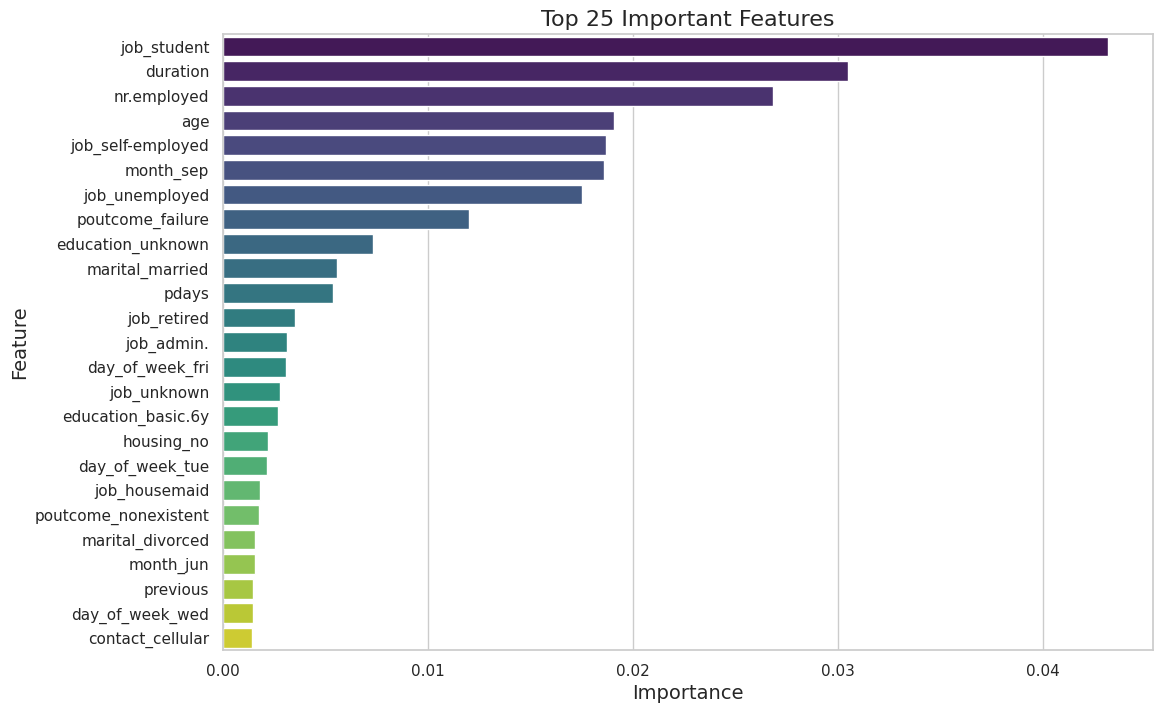

In [ ]:
# Set style
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df.head(25), palette='viridis')

# Add title and labels
plt.title('Top 25 Important Features', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.show()

The software calculation of feature importance indeed makes logical sense. For instance, it shows that students do not fit into the overall trend. Additionally, the duration of the last communication might be important, especially if the conversation was prolonged and presumably "problematic." Age is usually an important feature as well. However, the month feature appears illogical, unless it relates to the beginning of the school year and, consequently, an increase in expenses for those with school-aged children. This aspect could be explored in more detail.

# Error Analysis of the XGBoost Model

In [ ]:
# Getting predictions for the validation data
y_val_pred_xgb = xgb_model.predict(X_val_poly)

# Evaluating the confusion matrix
cm = confusion_matrix(y_val, y_val_pred_xgb)
print("Confusion Matrix:")
print(cm)

# Evaluating the classification report
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_xgb))

# Analyzing misclassifications (examples where the model made mistakes)
incorrect_indices = y_val != y_val_pred_xgb

# Restoring the original data for misclassifications
incorrect_original_data = X_val[incorrect_indices]
incorrect_true_labels = y_val[incorrect_indices]
incorrect_pred_labels = y_val_pred_xgb[incorrect_indices]

# Creating a DataFrame with misclassifications for further analysis
incorrect_predictions_df = incorrect_original_data.copy()
incorrect_predictions_df['True Label'] = incorrect_true_labels.values
incorrect_predictions_df['Predicted Label'] = incorrect_pred_labels


Confusion Matrix:
[[6562  746]
 [ 129  799]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      7308
           1       0.52      0.86      0.65       928

    accuracy                           0.89      8236
   macro avg       0.75      0.88      0.79      8236
weighted avg       0.93      0.89      0.90      8236



In [ ]:
incorrect_predictions_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,True Label,Predicted Label
27173,40,blue-collar,divorced,basic.9y,no,no,no,cellular,nov,fri,...,-1,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0,1
18396,35,technician,married,professional.course,no,yes,no,cellular,jul,thu,...,-1,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0,1
37058,36,technician,single,high.school,no,yes,no,cellular,jul,wed,...,-1,1,failure,-2.9,92.469,-33.6,1.029,5076.2,0,1
20325,38,admin.,single,university.degree,no,yes,yes,cellular,aug,mon,...,-1,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0,1
35091,36,management,divorced,university.degree,no,unknown,unknown,cellular,may,fri,...,-1,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38925,21,student,single,professional.course,no,no,no,telephone,nov,wed,...,-1,0,nonexistent,-3.4,92.649,-30.1,0.716,5017.5,0,1
19684,38,technician,married,high.school,no,yes,no,cellular,aug,thu,...,-1,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,0,1
8119,28,services,single,high.school,no,no,no,telephone,jun,mon,...,-1,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,0,1
15695,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,-1,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,0,1


<Figure size 1000x600 with 0 Axes>

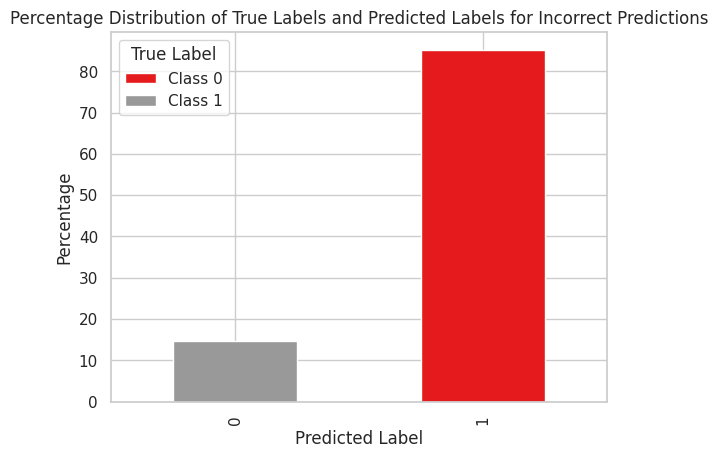

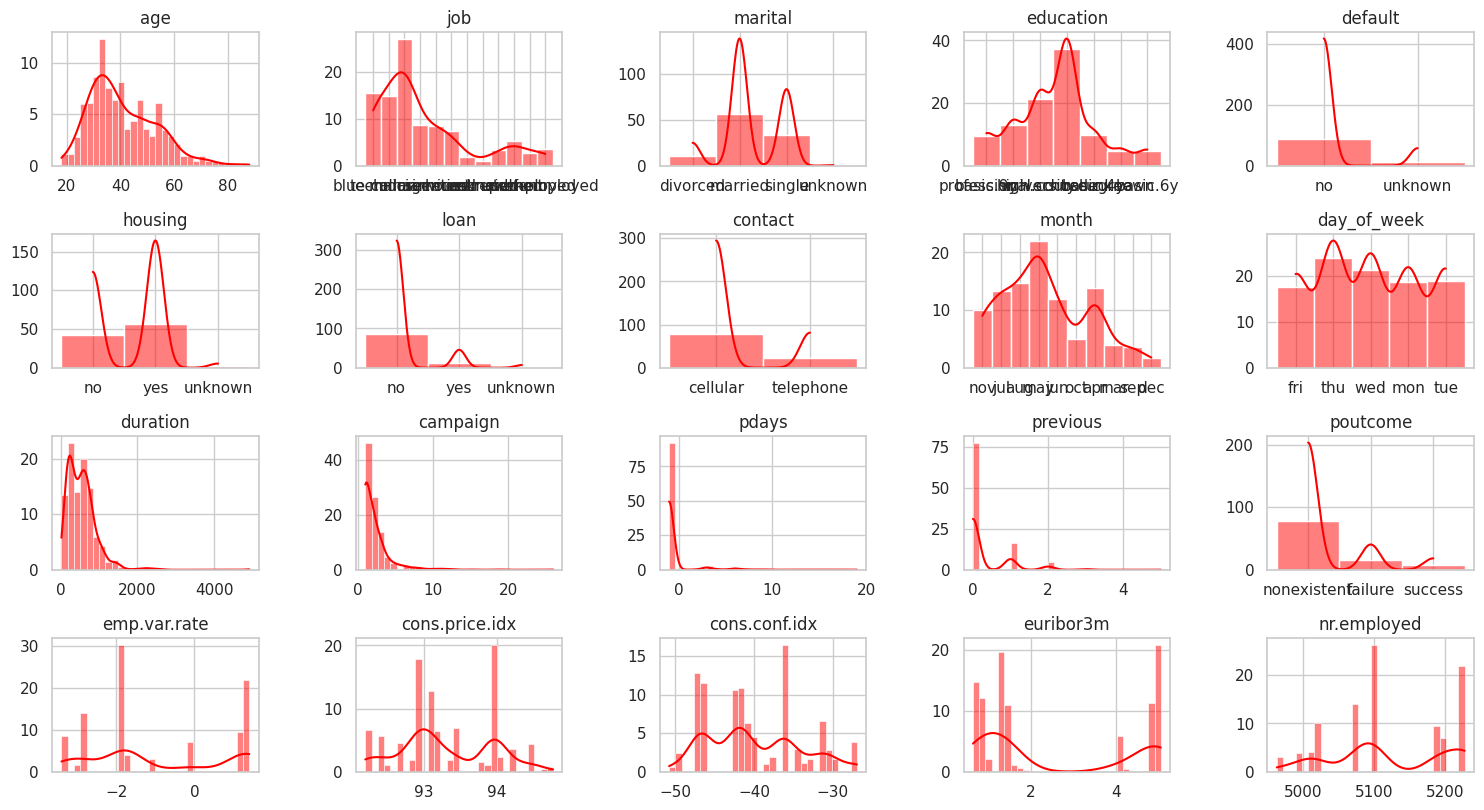

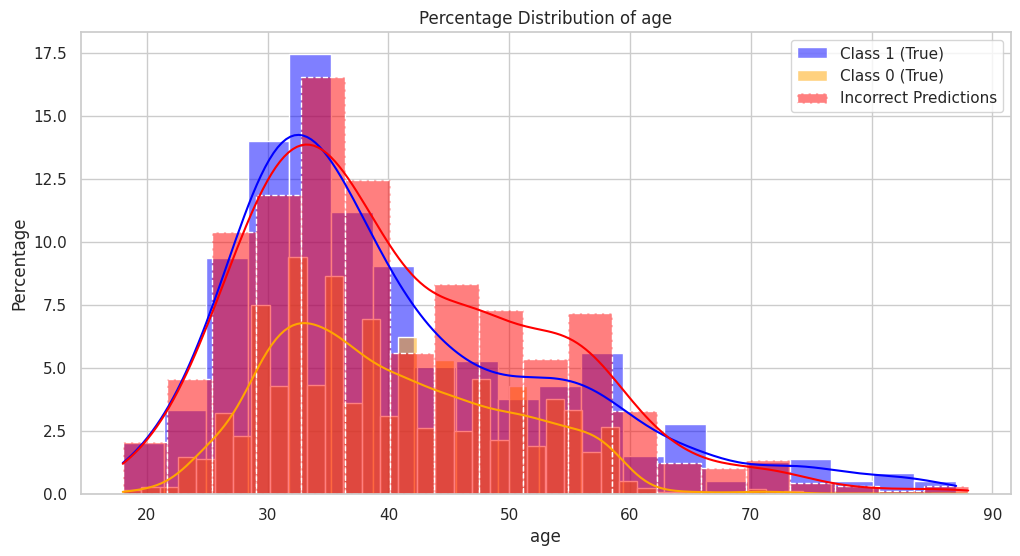

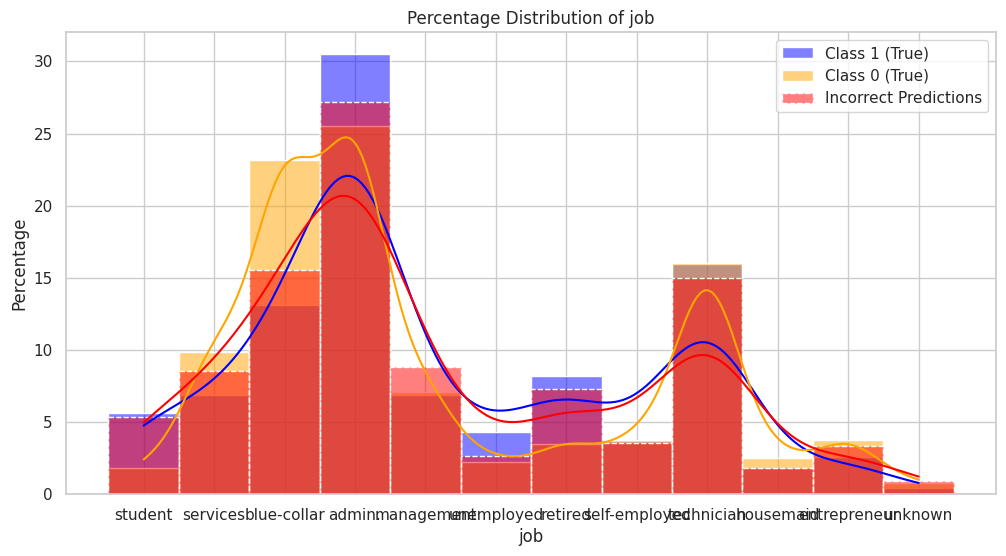

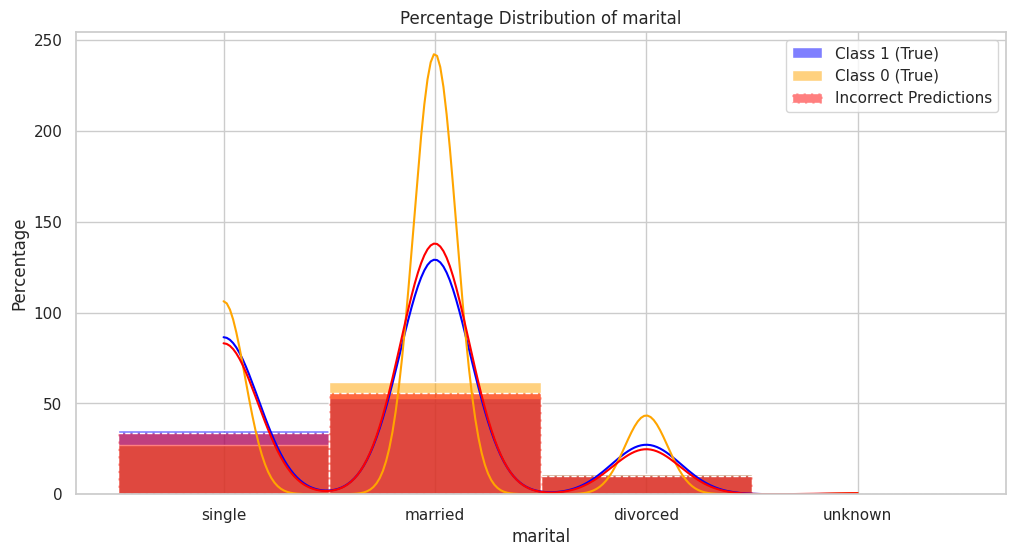

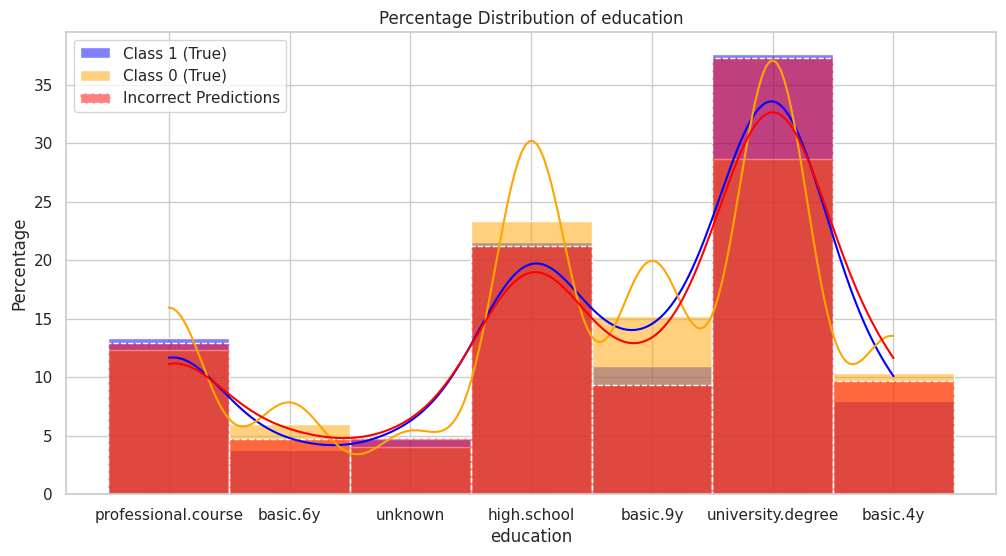

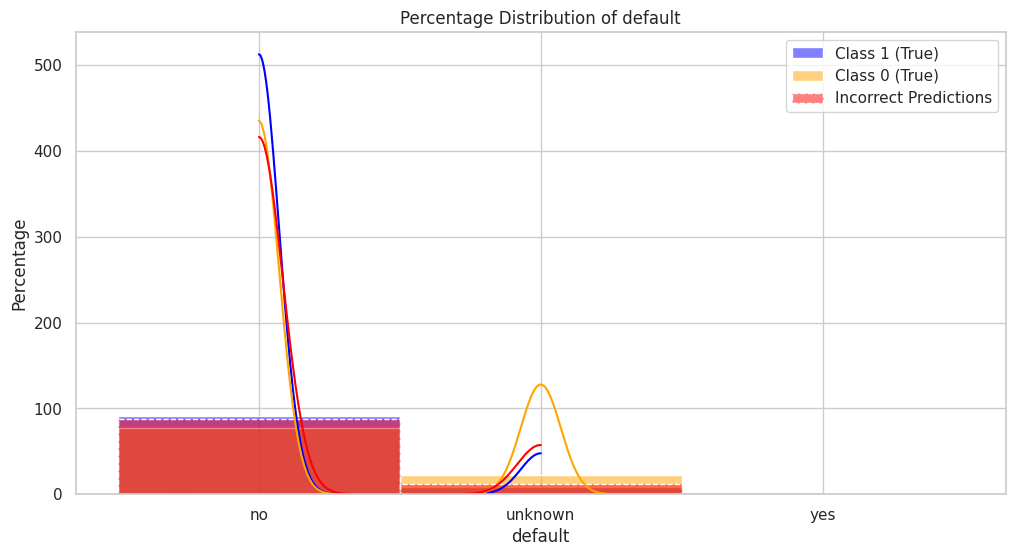

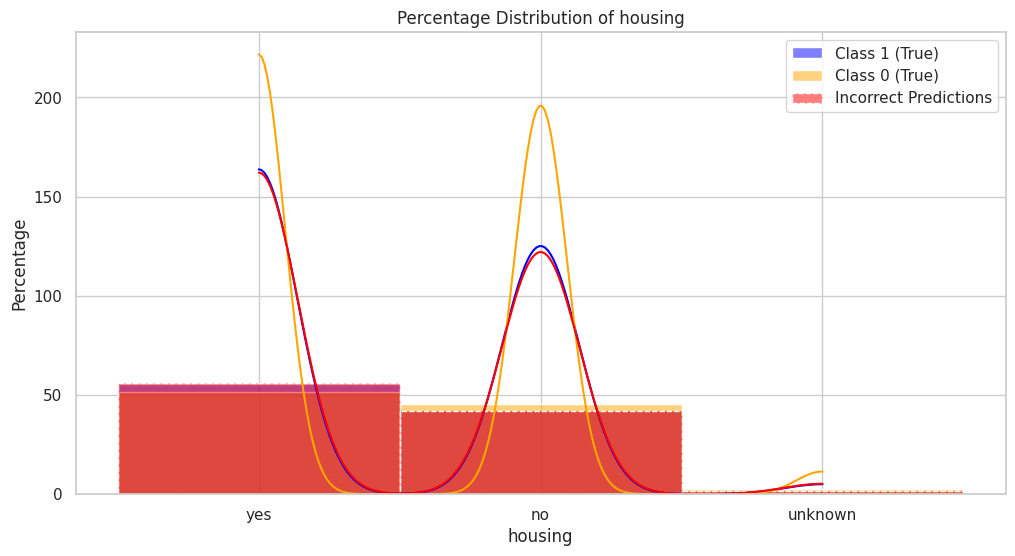

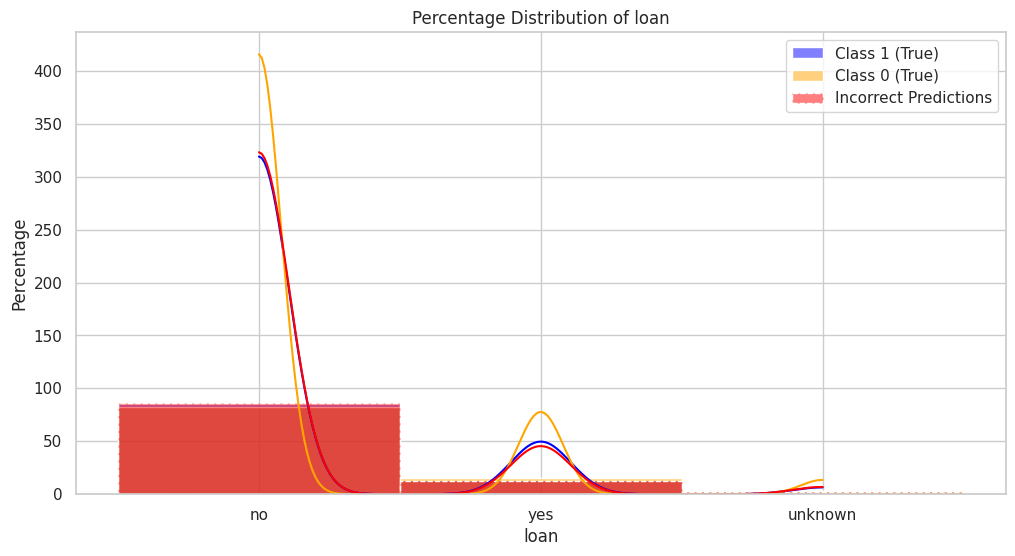

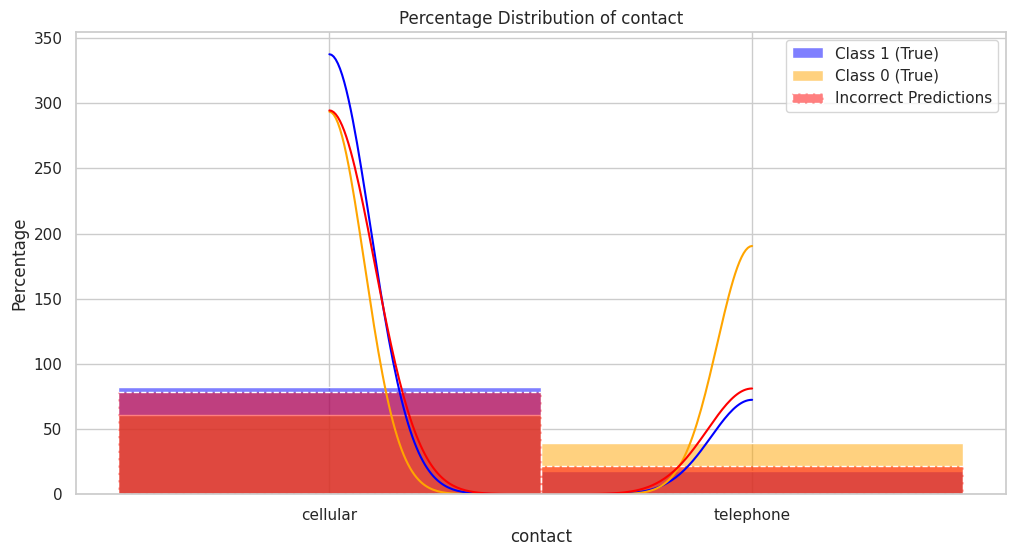

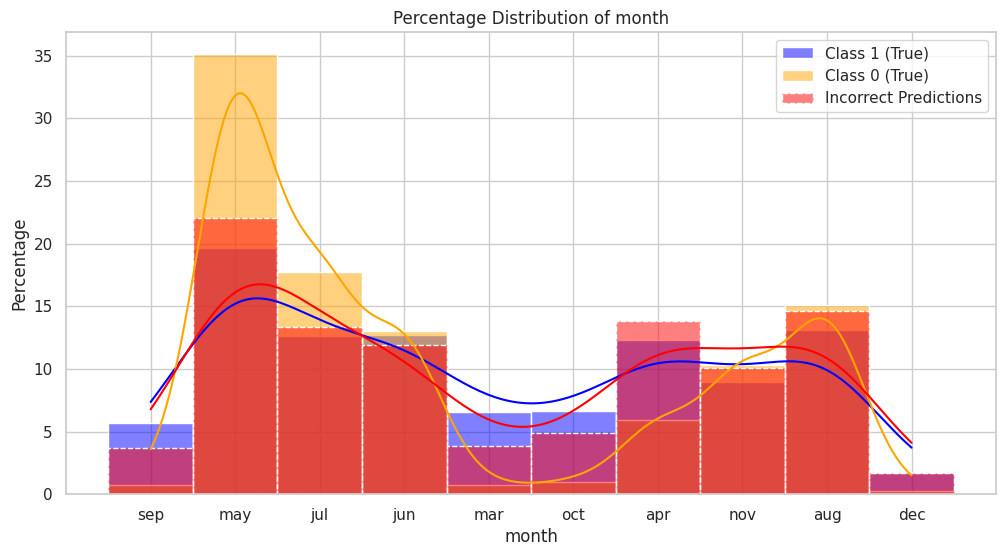

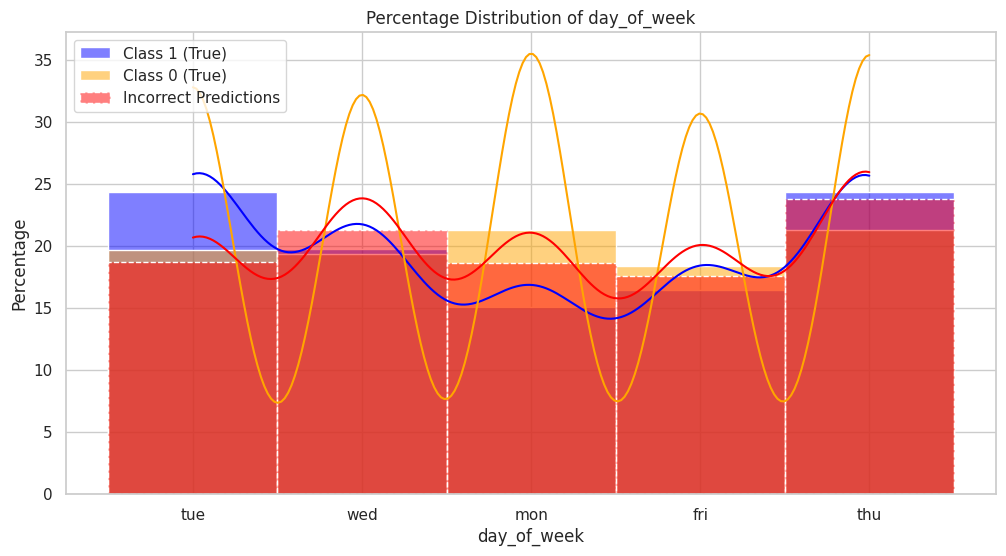

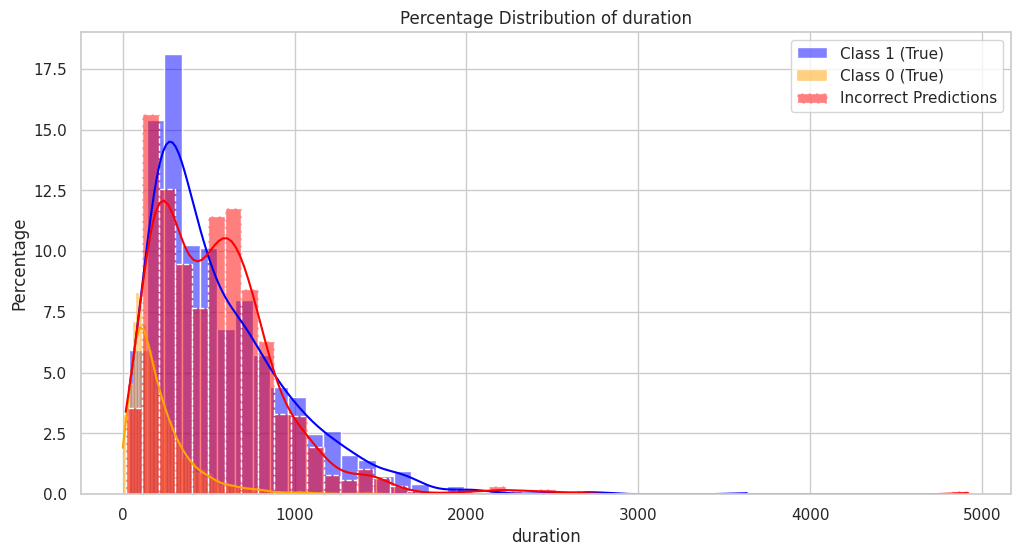

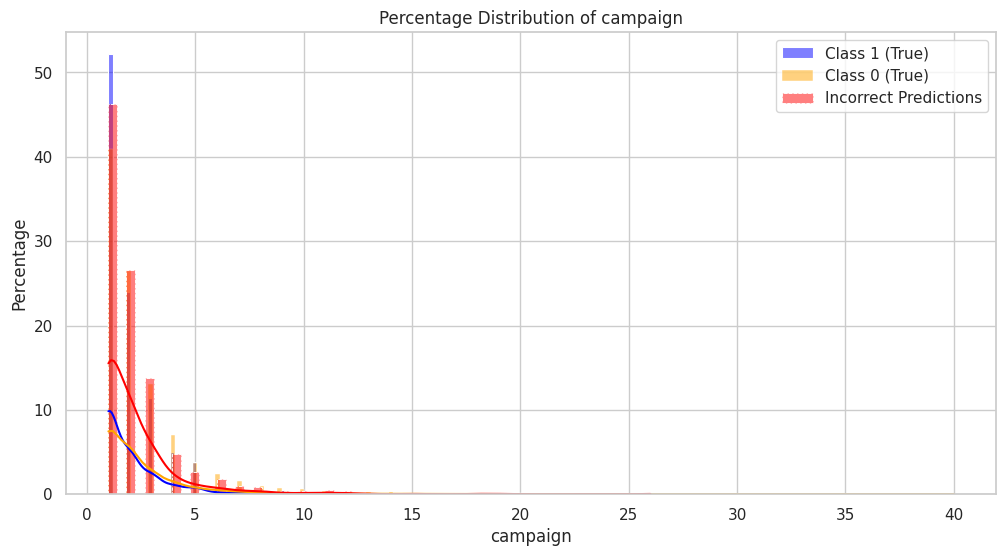

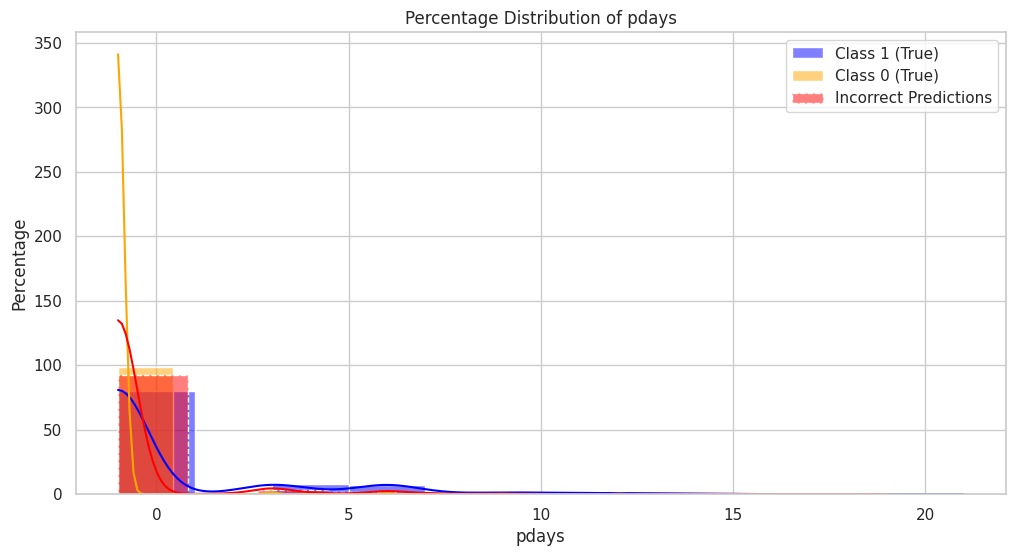

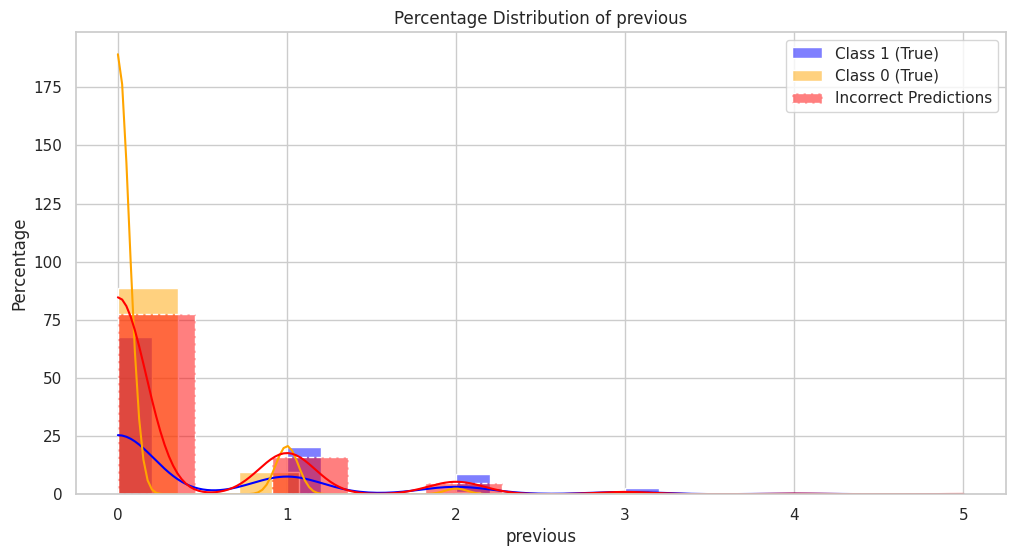

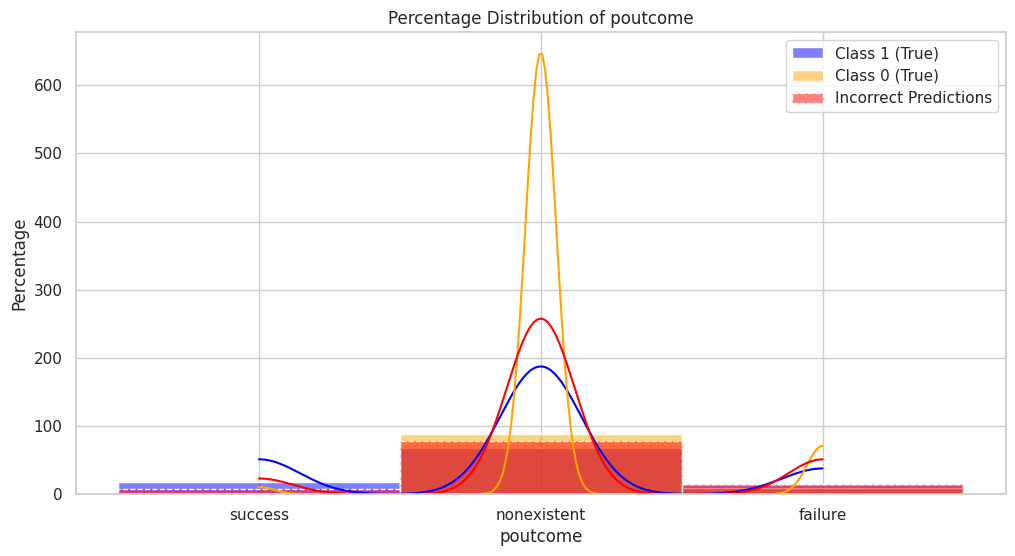

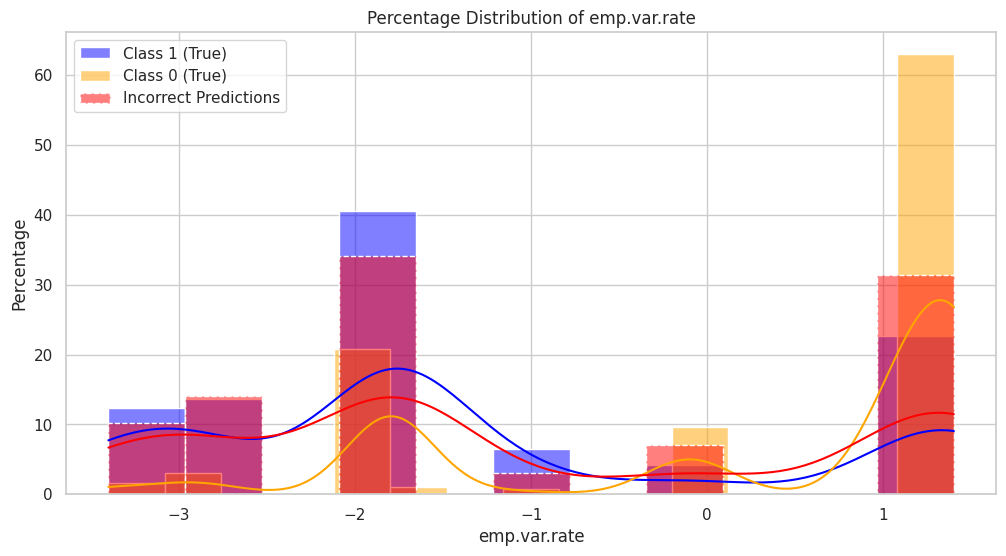

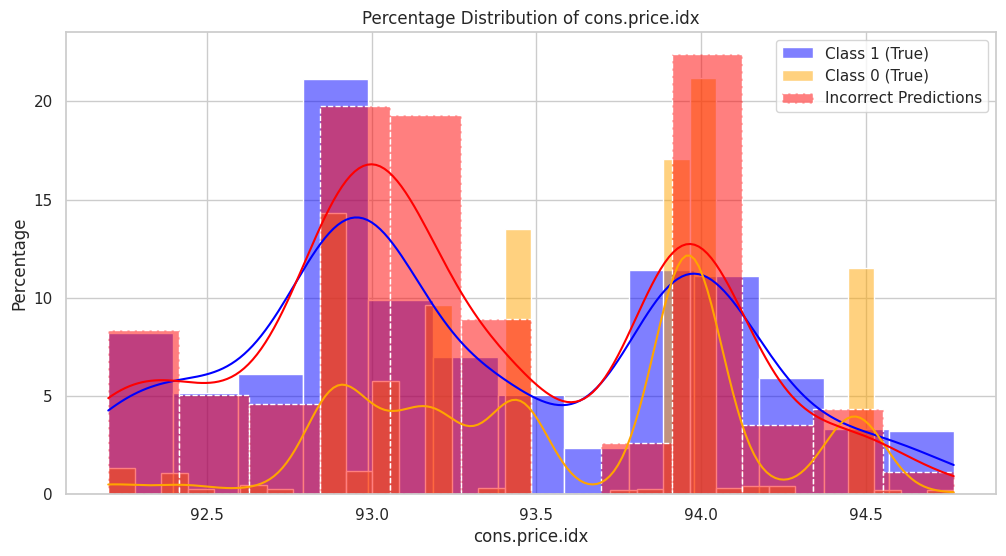

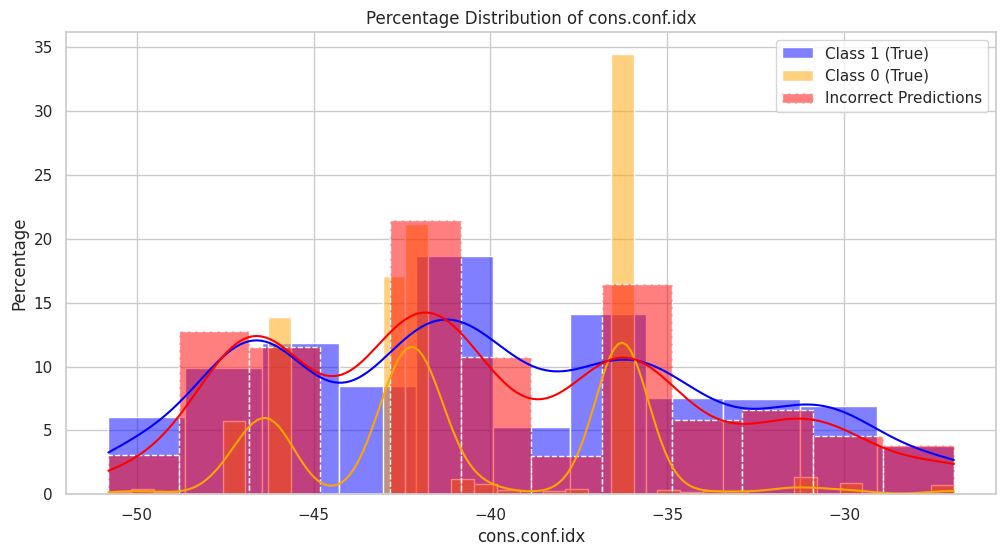

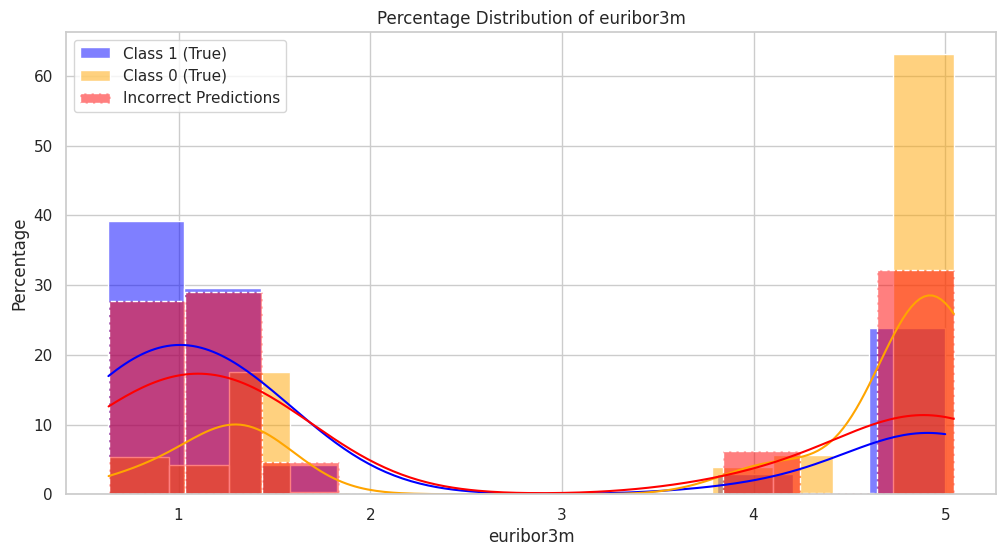

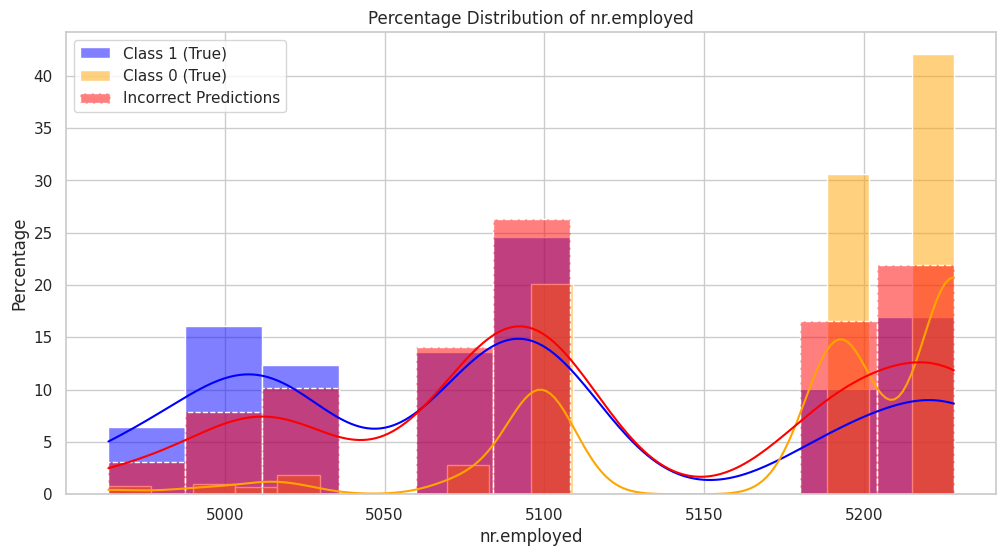

In [ ]:
# Distribution of true and predicted labels for misclassifications in percentages
plt.figure(figsize=(10, 6))
incorrect_counts = incorrect_predictions_df.groupby(['Predicted Label', 'True Label']).size().unstack().fillna(0)
incorrect_percentage = (incorrect_counts / incorrect_counts.sum().sum()) * 100
incorrect_percentage.plot(kind='bar', stacked=True, colormap='Set1')
plt.title('Percentage Distribution of True Labels and Predicted Labels for Incorrect Predictions')
plt.xlabel('Predicted Label')
plt.ylabel('Percentage')
plt.legend(title='True Label', labels=['Class 0', 'Class 1'])
plt.show()

# Percentage distribution of values for each feature for misclassifications
num_features = incorrect_predictions_df.shape[1] - 2  # Number of features (excluding True Label and Predicted Label)

plt.figure(figsize=(15, 10))
for i, column in enumerate(incorrect_predictions_df.columns[:-2], 1):  # Exclude 'True Label' and 'Predicted Label'
    plt.subplot(5, 5, i)
    sns.histplot(incorrect_predictions_df[column], kde=True, bins=30, color='red', stat='percent')
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

# Comparing the percentage distribution of values for features between correct and incorrect classifications
# Using the original data for comparison
X_val_original = X_val.copy()
X_val_original['True Label'] = y_val

# Comparison for each feature
for column in X_val_original.columns[:-1]:  # Exclude 'True Label'
    plt.figure(figsize=(12, 6))
    sns.histplot(X_val_original[X_val_original['True Label'] == 1][column], kde=True, color='blue', stat='percent', label='Class 1 (True)')
    sns.histplot(X_val_original[X_val_original['True Label'] == 0][column], kde=True, color='orange', stat='percent', label='Class 0 (True)')
    sns.histplot(incorrect_predictions_df[column], kde=True, color='red', stat='percent', label='Incorrect Predictions', linestyle='--')
    plt.title(f'Percentage Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Percentage')
    plt.legend()
    plt.show()

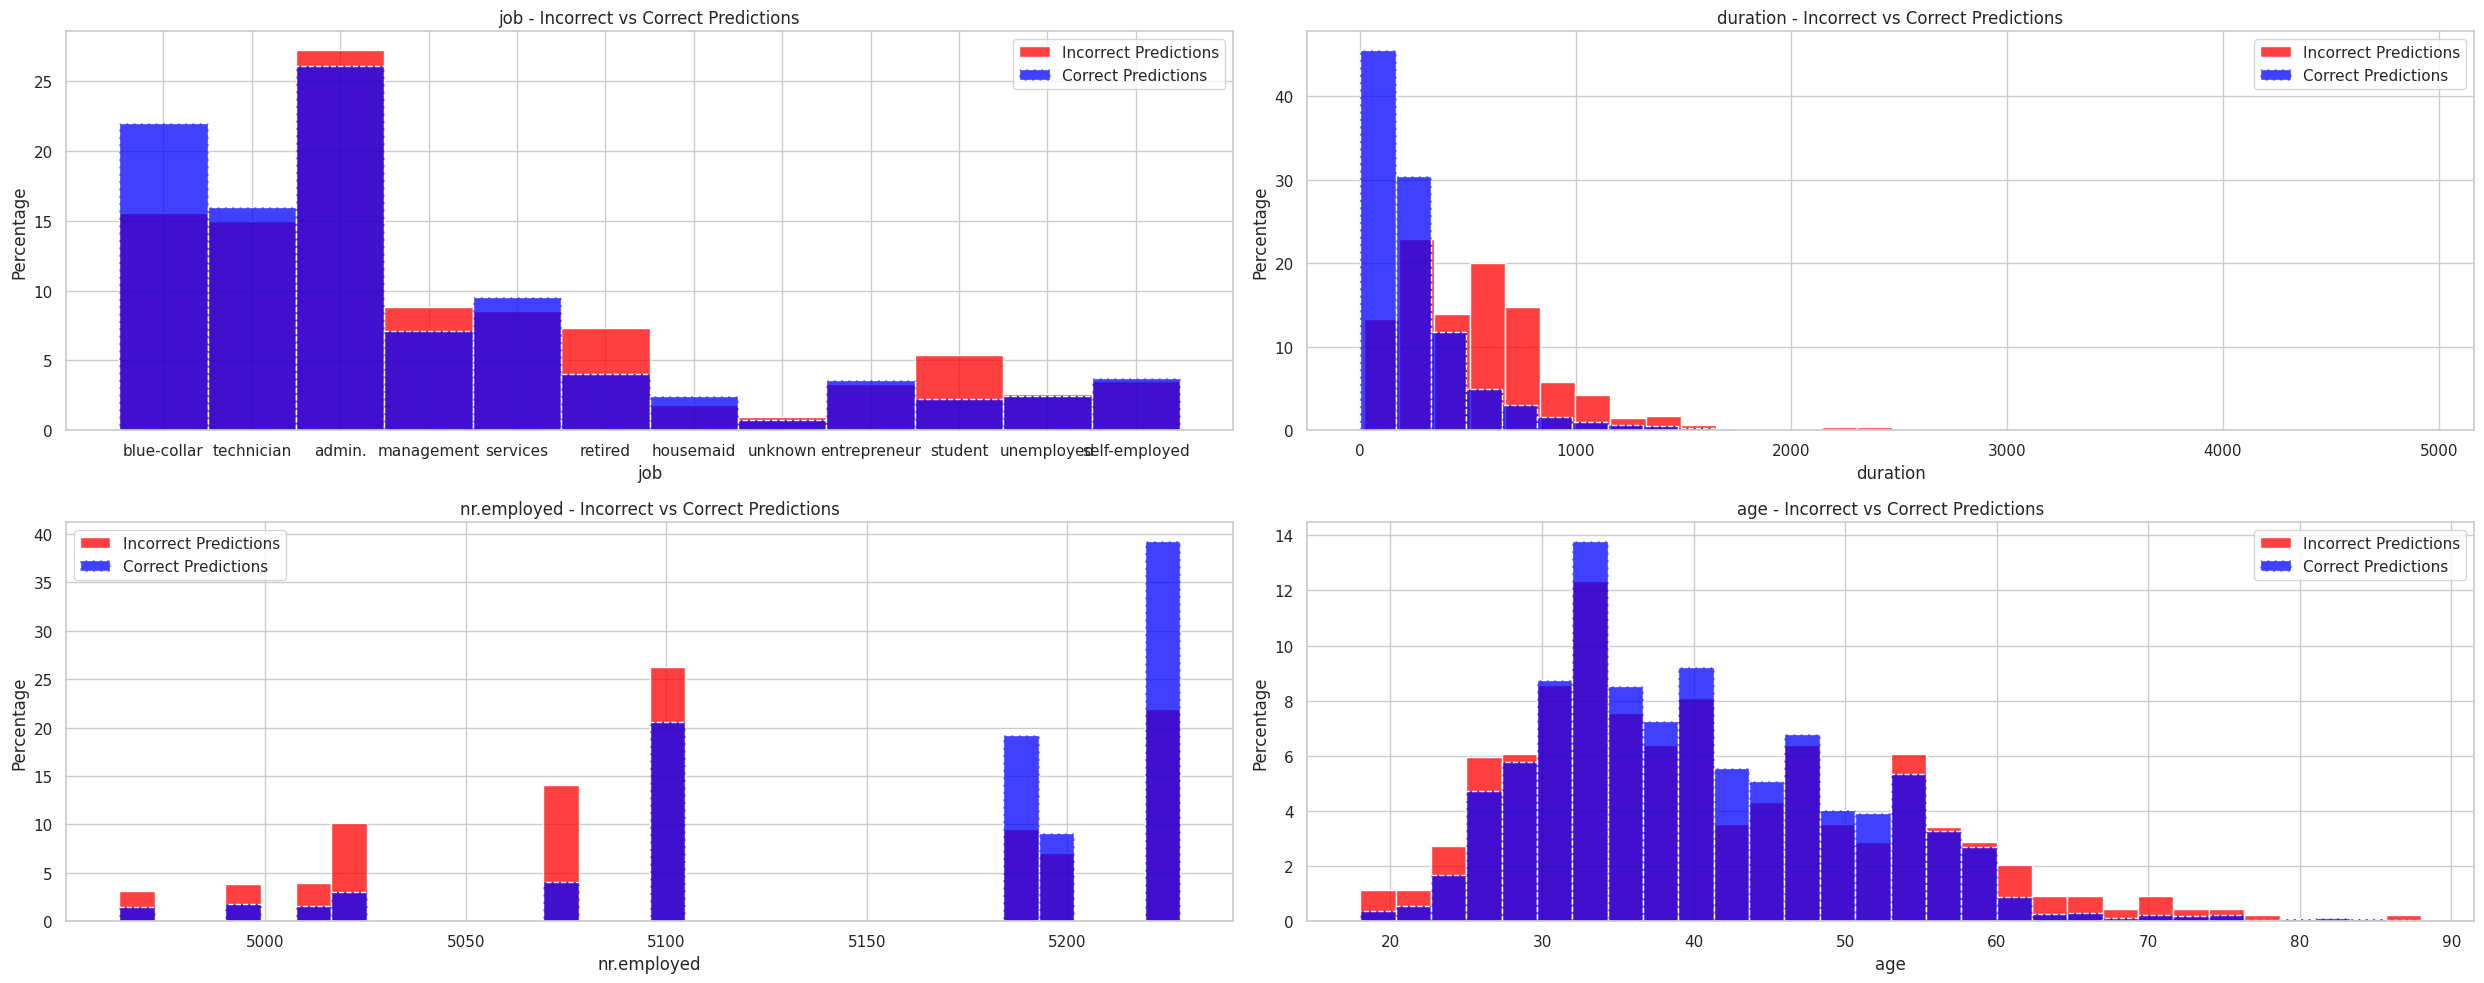

In [ ]:
# Selected columns
selected_columns = ['job', 'duration', 'nr.employed', 'age']

# Percentage distribution of values for each feature
plt.figure(figsize=(25, 10))  # Increased size of the plot

for i, column in enumerate(selected_columns, 1):
    plt.subplot(2, 2, i)

    # Histogram for misclassifications
    sns.histplot(incorrect_predictions_df[column], kde=False, bins=30, color='red', stat='percent', label='Incorrect Predictions')

    # Line plot for all data (correct classifications)
    sns.histplot(X_val[column], kde=False, bins=30, color='blue', stat='percent', label='Correct Predictions', linestyle='--')

    plt.title(f'{column} - Incorrect vs Correct Predictions')
    plt.xlabel(column)
    plt.ylabel('Percentage')
    plt.legend()

plt.tight_layout()
plt.show()


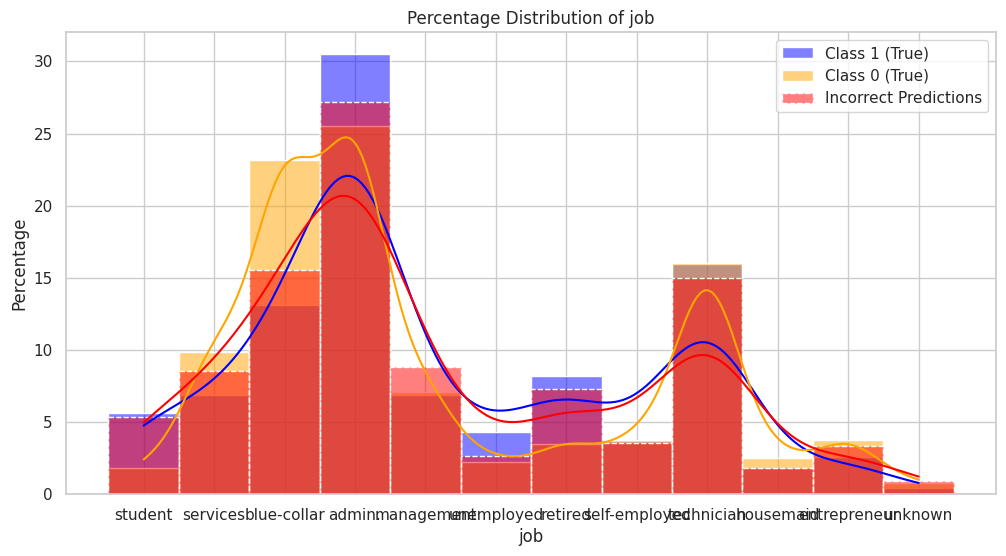

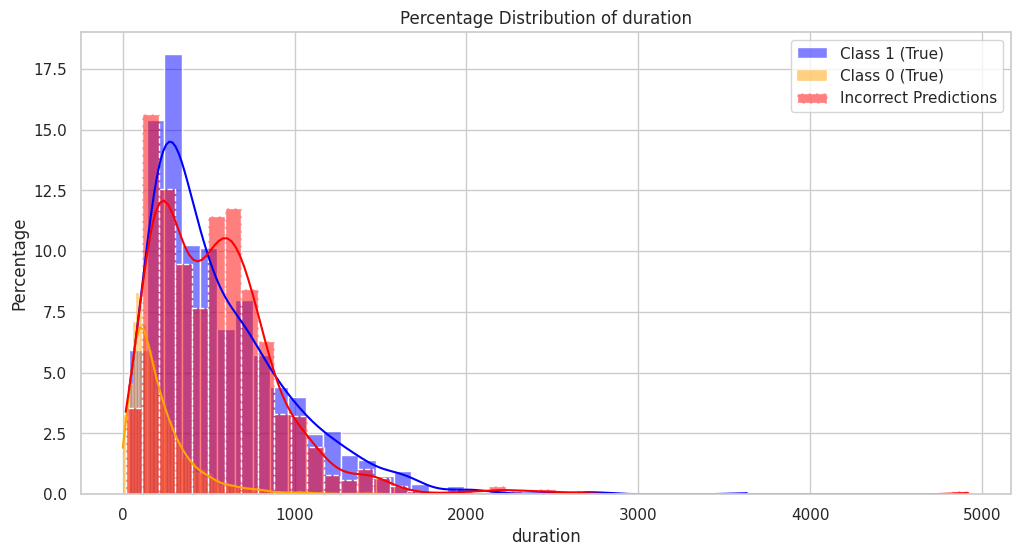

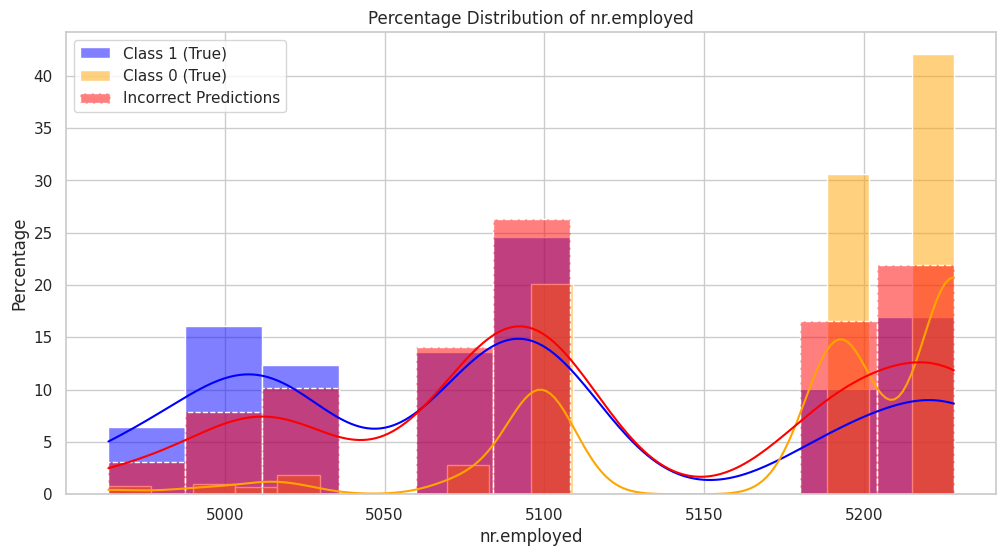

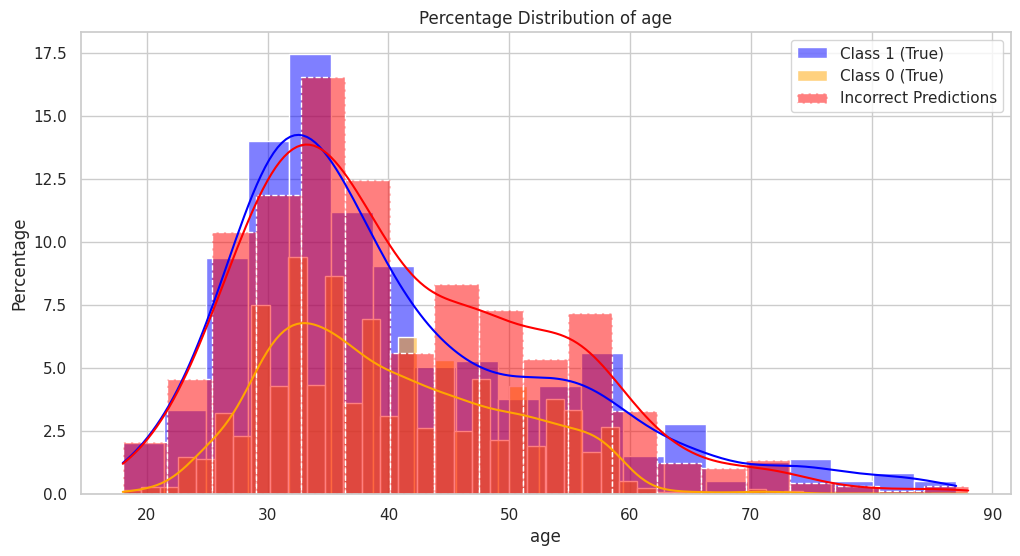

In [ ]:
# Original data for comparison
X_val_original = X_val.copy()
X_val_original['True Label'] = y_val

# Comparison for each feature
for column in selected_columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(X_val_original[X_val_original['True Label'] == 1][column], kde=True, color='blue', stat='percent', label='Class 1 (True)')
    sns.histplot(X_val_original[X_val_original['True Label'] == 0][column], kde=True, color='orange', stat='percent', label='Class 0 (True)')
    sns.histplot(incorrect_predictions_df[column], kde=True, color='red', stat='percent', label='Incorrect Predictions', linestyle='--')
    plt.title(f'Percentage Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Percentage')
    plt.legend()
    plt.show()


In [ ]:
# Selected columns
selected_columns = ['job', 'duration', 'nr.employed', 'age']

# Creating an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Feature', 'Value', 'Incorrect Count', 'Incorrect Percentage', 'Correct Count', 'Correct Percentage', 'Difference'])

for column in selected_columns:
    incorrect_counts = incorrect_predictions_df[column].value_counts()
    correct_counts = X_val[column].value_counts()

    total_incorrect = len(incorrect_predictions_df)
    total_correct = len(X_val)

    for value in incorrect_counts.index:
        incorrect_count = incorrect_counts[value]
        correct_count = correct_counts.get(value, 0)

        incorrect_percentage = (incorrect_count / total_incorrect) * 100
        correct_percentage = (correct_count / total_correct) * 100

        difference = incorrect_percentage - correct_percentage

        row = pd.DataFrame({
            'Feature': [column],
            'Value': [value],
            'Incorrect Count': [incorrect_count],
            'Incorrect Percentage': [incorrect_percentage],
            'Correct Count': [correct_count],
            'Correct Percentage': [correct_percentage],
            'Difference': [difference]
        })

        results_df = pd.concat([results_df, row], ignore_index=True)

# Sorting results by the "Difference" column in descending order
results_df = results_df.sort_values(by='Difference', ascending=False)

# Displaying results
results_df

,Feature,Value,Incorrect Count,Incorrect Percentage,Correct Count,Correct Percentage,Difference
601,nr.employed,5076.2,123,14.057143,332,4.031083,10.026060
603,nr.employed,5017.5,74,8.457143,215,2.610491,5.846652
599,nr.employed,5099.1,230,26.285714,1695,20.580379,5.705335
5,job,retired,64,7.314286,330,4.006799,3.307486
6,job,student,47,5.371429,184,2.234094,3.137334
...,...,...,...,...,...,...,...
640,age,42,14,1.600000,249,3.023312,-1.423312
604,nr.employed,5195.8,62,7.085714,747,9.069937,-1.984223
1,job,blue-collar,136,15.542857,1813,22.013113,-6.470256
602,nr.employed,5191.0,83,9.485714,1586,19.256921,-9.771207


Suggestions for Model Improvement Based on Errors
- Grouping by Profession: It would be beneficial to categorize individuals by their profession, particularly to identify unemployed groups such as students and retirees, as these categories account for the majority of errors. Creating this feature would also help address the issue of age, as the minimum and maximum ages are associated with the highest error rates.

- Duration Segmentation: The duration feature could be effectively divided into three groups: 0-500, 500-1500, and greater than 1500. Values exceeding 1500 could be treated as outliers and excluded from model training altogether, or replaced with the mode or mean (which is 259). Additionally, a new column representing the duration in minutes or hours could be created for further analysis.

- Employment Numbers Grouping: The nr.employed feature could also be divided into two categories based on percentiles or averages. Alternatively, we might consider not training the model on this data at all.

Overall, the model’s performance is quite good and can be utilized effectively even without these suggestions from the previous findings.